# Выделение групп пользователей  на основе их поведения

### Материалы:    

- Презентация https://disk.yandex.ru/i/RQmnD15IOapziA
- Дашборд https://public.tableau.com/app/profile/natalia.anokhina/viz/Dash_final_project_16812710726010/Dashboard1?publish=yes

Исследуем аудиторию мобильного приложения, в котором пользователи продают свои вещи, размещая их на доске объявлений.   

В нашем распоряжении данные о действиях пользователей.  Необходимо сегментировать пользователей на целевую и смежную аудитории для улучшения и адаптации приложения под каждую из них.

**ЦЕЛЬ ИССЛЕДОВАНИЯ**:
1. Определить целевую аудиторию приложения среди выделенных групп:   
   - Какие пользователи чаще всего возвращаются в приложение;    
   - Какие пользователи чаще всего совершают целевое событие - просмотр контактов;      


2. Проверить гипотезы:
   - О разнице конверсий в просмотр контактов между пользователями, пришедшими через "Yandex" и пользователями, пришедшими через "Google";
   - О разнице конверсий в просмотр контактов между пользователями, просмотревшими фотографии в объявлении и пользователями,никогда не смотревшими фотографии.

**ХОД ИССЛЕДОВАНИЯ**     

Данные полученны из файлов mobile_dataset.csv и mobile_sources.csv.    
О качестве данных ничего неизвестно, поэтому перед анализом потребуется их обзор и предобработка. Таким образом, исследование пройдет в 6 этапов:

**1. Загрузка и первичный обзор данных.**

**2. Предобработка данных:**     

2.1 Проверить данные на наличие дубликатов: явных и неявных;    
2.2 Выявить пропуски и их обработать, в случае необходимости;   
2.3 Исправить стиль заголовков;     
2.4 Привести данные к нужным типам, где это требуется;     
2.5 Объединенить данные:        
          - из двух датасетов в один;     
          - объединенить события, обозначающие одни и те же действия в одну группу событий;               
2.6 Обработать столбец с датой: округлить время до секунд и выделелить необходимые параметры в отдельные столбцы, такие как номер дня недели и время первого события.

**3. Исследовательский анализ данных:**     

3.1 Оценить возвращаемость пользователей в приложение с помощью коэффициента удержания Retention Rate;    
3.2 Оценить время, проведенное в приложении на основании выделенных сессий пользователей;    
3.3 Оценить частоту совершенных событий;       
3.4 Оценить конверсию в целевое событие - просмотр контактов.  

**4. Проведение сегментации пользователей:**  

4.1 Среди выделенных групп определить лучшую по возвращаемости пользователей по метрике Retention Rate;    
4.2 Среди выделенных групп определить лучшую по конверсии в целевое событие - просмотр контактов.

**5. Проверка гипотез:**    

5.1  О разнице конверсий в просмотр контактов между пользователями, пришедшими через "Yandex" и пользователями, пришедшими через "Google".    
```
H_0: Конверсии в событие "Просмотр контактов", совершенное пользователями из "Yandex"  и совершенное пользователями из "Google" одинаковы.
H_1: Конверсии в событие "Просмотр контактов", совершенное пользователями из "Yandex"  и совершенное пользователями из "Google" различаются.

```
5.2  О разнице конверсий в просмотр контактов между пользователями, просмотревшими фотографии в объявлении и пользователями,никогда не смотревшими фотографии.    
```
H_0: Конверсии в целевое событие "Просмотр контактов", совершенное пользователями просмотревшими фотографии в объявлении и пользователями, которые фотографии не просматривают одинаковые.
H_1: Конверсии в целевое событие "Просмотр контактов", совершенное пользователями просмотревшими фотографии в объявлении и пользователями, которые фотографии не просматривают различаются.

```

**6. Вывод и рекомендации**

### Шаг 1. Загрузка и первичный обзор данных.

Импортируем необходимые библиотеки, настроим отображение таблиц и загрузим данные в переменные `data_events` и `data_sources`.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go

import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_columns', None) # настроим отображение всех столбцов на экране
pd.set_option('display.max_colwidth', None) # настроим отображение текста в ячейках
pd.set_option('display.float_format', '{:.2f}'.format) # настроим отображение вещественных чисел до 3 наков

#настроим отображение графиков
plt.style.use('seaborn-pastel')
color = sns.color_palette("crest")

In [3]:
# загружаем данные
try:
    data_events = pd.read_csv('/datasets/mobile_dataset.csv')
    data_sourse = pd.read_csv('/datasets/mobile_sources.csv')

except:
    data_events = pd.read_csv('mobile_dataset.csv')
    data_sourse = pd.read_csv('mobile_sourсes.csv')

----

Для быстрого изучения данных создадим функцию `data_info`, которая выведет на экран первые 5 строк таблицы, основную инфоромацию по ней с типами данных каждого признака, информацию о числе пропусков и о количистве дубликатов. Затем применим ее к исследуемым датасетам:

In [4]:
def data_info(df):
    # выводим первые 5 строк датафрема
    display(df.head())
    # применяем метод info()
    print()
    print('Общая информация:')
    print(df.info())
    print()
    # считаем пропущенные значения:
    print('Число пропущенных значений:')
    print(df.isna().sum())
    print()
    # находим число строк-дубликатов в датафреме
    print('Количество строк-дубликатов:', df.duplicated().sum())

---

In [5]:
data_info(data_events)

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None

Число пропущенных значений:
event.time    0
event.name    0
user.id       0
dtype: int64

Количество строк-дубликатов: 0


<div style="border:solid Gray 1px; padding: 20px">  
    
В таблице 3 столбца. Встречается только один тип данных - object.

Согласно документации:      
**event.time** — время совершения события;   
**event.name** — название события;   
**user.id** — идентификатор пользователя.   
  
В названиях колонок видны нарушения стиля, над которым нужно поработать.     
Тип данных признака `event.time` не соответствует заявленному описанию.    
Пропущенных значений в датасете нет.   
Явных строк-дубликатов не найдено.

In [6]:
data_info(data_sourse)

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
None

Число пропущенных значений:
userId    0
source    0
dtype: int64

Количество строк-дубликатов: 0


<div style="border:solid Gray 1px; padding: 20px">  
    
В таблице 2 столбца. Встречается только один тип данных - object.

Согласно документации:      
**userId** — идентификатор пользователя;   
**source** — источник, из которого пользователь установил приложение.     
  
В названиях колонок видны нарушения стиля, над которым нужно поработать.     
Типы данных соответствуют заявленному описанию.    
Пропущенных значений в датасете нет.   
Явных строк-дубликатов не найдено.

**Вывод**   
В каждой строке таблицы `data_events` - действие пользователя (событие) в мобильном приложении. Часть столбцов описывает само событие: название события и время его совершения, а другая часть идентифицирует пользователя, который это событие совершил. В датасете `data_sourse` находится информация об источниках, из которых пользователь пришел в приложение, вследствие чего возникает мысль об объединении двух датасетов в один.       
Предварительно можем утверждать, что данных достаточно для проверки гипотез.   
Пропуски и явные дубликаты в данных отсутствуют, но встречается несоответствие типов данных, и в названиях колонок — расхождения с хорошим стилем, также стоит проверить данные на неявные дубликаты.

### Шаг 2. Предобработка данных

**Стиль заголовков**

Приведем заголовки обоих датасетов в соответствие с хорошим стилем и проверим результат:

In [7]:
# изменим заголовки в датасете data_events
data_events.columns = [c.replace('.','_') for c in data_events.columns]
data_events.columns

Index(['event_time', 'event_name', 'user_id'], dtype='object')

In [8]:
# изменим заголовки в датасете data_sourse
data_sourse.rename(columns={'userId':'user_id'}, inplace = True)
data_sourse.columns

Index(['user_id', 'source'], dtype='object')

**Изменение типов данных**

Изменим тип данных признака `event_time` в датасете `data_events` на datetime и округлим время до секунд:

In [9]:
# меняем тип данных
data_events['event_time'] = pd.to_datetime(data_events['event_time'], format='%Y-%m-%d %H:%M:%S')

# округляем время до секунд
data_events['event_time'] = data_events['event_time'].astype('datetime64[s]')

**Объединение таблиц**

Для начала проверим сколько уникальных пользователей содержится в каждой таблице:

In [10]:
print('Число уникальных пользователей датасета с событиями:', data_events['user_id'].nunique())
print('Число уникальных пользователей, по которым указан источник:', data_sourse['user_id'].nunique())

Число уникальных пользователей датасета с событиями: 4293
Число уникальных пользователей, по которым указан источник: 4293


Теперь убедимся, что идентификаторы пользователей в обеих таблицах одни и те же с помощью метода *set()*:

In [11]:
# создаем множество пользователей из data
a = set(data_events['user_id']) 
# создаем множество пользователей из data_sourse
b = set(data_sourse['user_id'])

#сравниваем пользователей между собой
if a == b:
    print('В таблицах одинаковые пользователи') 
else: 
    print('В таблицах разные пользователи')       

В таблицах одинаковые пользователи


Можем объединить таблицы в одну, сохраним ее в переменную `data`:

In [12]:
data = data_events.merge(data_sourse, on='user_id', how='left')
data.head(3)

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


В объединенной таблице сохранились все исходные события. Пропущенные значения по-прежнему не найдены.

**Дубликаты**

После округления времени событий до секунд и объединения датасетов еще раз проверим данные на наличие явных дубликатов:

In [14]:
print('Число явных дубликатов:', data.duplicated().sum(), 'шт. ( или',
      '{0:.1%}'.format(data.duplicated().sum()/data.shape[0]),')')

Число явных дубликатов: 1143 шт. ( или 1.5% )


1.5% - это не очень много, поэтому удалим образовавшиеся в результате округления строки-дубликаты:

In [15]:
data = data.drop_duplicates().reset_index(drop=True)
print('Число строк-дубликатов:', data.duplicated().sum())

Число строк-дубликатов: 0


Поищем в признаках `source` и `event_name` неявные дубликаты. Для этого выведем уникальные значения признаков на экран.

In [16]:
print('Виды источников:', data['source'].sort_values().unique())
print('')
print('Виды событий:', data['event_name'].sort_values().unique())

Виды источников: ['google' 'other' 'yandex']

Виды событий: ['advert_open' 'contacts_call' 'contacts_show' 'favorites_add' 'map'
 'photos_show' 'search_1' 'search_2' 'search_3' 'search_4' 'search_5'
 'search_6' 'search_7' 'show_contacts' 'tips_click' 'tips_show']


События `'contacts_show'` и `'show_contacts'` означают одно и то же действие, поэтому их обозначим как `'contacts_show'`.      

Также стоит отметить, что события `search_1 — search_7` - это хоть и разные события, но в рамках данного исследования важно лишь то, что все они связаны с поиском по приложению, поэтому их все объединим в общую группу `search`.

In [17]:
# объединяем событие contacts_show
data['event_name'] = data['event_name'].replace('show_contacts', 'contacts_show')

# объединяем событие search
for i in ['search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7']:
    data['event_name'] = data['event_name'].replace(i, 'search')
    
data['event_name'].value_counts()

tips_show        39907
photos_show       9352
search            6765
advert_open       6146
contacts_show     4376
map               3749
favorites_add     1414
tips_click         811
contacts_call      534
Name: event_name, dtype: int64

<div style="border:solid Gray 1px; padding: 20px">  
    
Таким образом, в исследовании будут рассмотрены 9 видов событий:
  
**advert_open** — пользователь открыл карточку объявления;   
**photos_show** — пользователь просмотрел фотографии в объявлении;     
**tips_show** — пользователь увидел рекомендованные объявления;   
**tips_click** — пользователь кликнул по рекомендованному объявлению;  
**contacts_show** — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления;   
**contacts_call** — пользователь позвонил по номеру телефона на карточке объявления;     
**map** — пользователь открыл карту размещенных объявлений;   
**search** — пользователь совершил события, связанные с поиском по сайту;       
**favorites_add** — пользователь добавил объявления в избранное.
  

**Создание необходимых столбцов**

Для дальнейшего исследования определим время, когда пользователь совершил первое действие в приложении, результат сохраним в столбец `first_time`. Кроме того, выделим столбец с номером дня недели `event_day` и часом посещения `event_hour`:

In [18]:
# находим для каждого пользователя время первого события
first_time = (
    data.groupby('user_id').agg({'event_time':'min'})
    .rename(columns={'event_time':'first_time'})
    .reset_index()
)
              
# присоединим данные о первом времени события к исследуемому датасету по ключу "user_id"
data = data.merge(first_time, on='user_id', how='left')

# извлекаем номер дня недели из времени события
data['event_day']=data['event_time'].dt.weekday
# извлекаем час события из времени события: 
data['event_hour']=data['event_time'].dt.hour

data.sample(3)

,event_time,event_name,user_id,source,first_time,event_day,event_hour
11507,2019-10-12 11:44:39,contacts_show,71a735e8-a704-4f79-a88e-ce0cfc5782c4,other,2019-10-07 12:27:25,5,11
58382,2019-10-29 14:40:52,tips_show,f388467c-4be2-46cc-b6f7-0f2f7f526ae4,other,2019-10-29 14:23:04,1,14
17117,2019-10-14 15:31:54,map,e0e93278-71b3-4f68-951f-ded06fdc237f,yandex,2019-10-14 07:44:49,0,15


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73054 entries, 0 to 73053
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  73054 non-null  datetime64[ns]
 1   event_name  73054 non-null  object        
 2   user_id     73054 non-null  object        
 3   source      73054 non-null  object        
 4   first_time  73054 non-null  datetime64[ns]
 5   event_day   73054 non-null  int64         
 6   event_hour  73054 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 4.5+ MB


**Вывод**    
Данные подготовлены к анализу: столбцы приведены к нужному типу, исправлен стиль заголовков, выделены необходимые параметры.    После этапа предобработки располагаем данными о 73054 событиях, совершенных 4293 пользователями, пришедшими в приложение из Яндекса, Гугла и других источников.     
Всего в исследовании будут рассмотрены 9 событий пользователей: 'advert_open', 'photos_show', 'tips_show', 'tips_click', 'contacts_show', 'contacts_call', 'map', 'search' и 'favorites_add'.    
За целевое событие в иследовании будет взят просмотр номера телефона 'contacts_show'.

---

Для подписи данных в столбчатых графиках заранее создадим функцию `annotate`, которая на вход принимает название созданной фигуры, и параметр форматирования (в нашем случае будем использовать его для регулирования количества знаков после запятой)

In [20]:
def annotate (fig_name, formatting):
    for p in fig_name.patches:
        fig_name.annotate(format(p.get_height(), formatting), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

----

### Шаг 3. Исследовательский анализ данных

Проверим за какой период располагаем данными:

In [21]:
print('Минимальная дата и время: {}'.format(data['event_time'].min()))
print('Максимальная дата и время: {}'.format(data['event_time'].max()))
print('Число дней в датасете: {}'.format(data['event_time'].max()-data['event_time'].min()))

Минимальная дата и время: 2019-10-07 00:00:00
Максимальная дата и время: 2019-11-03 23:58:12
Число дней в датасете: 27 days 23:58:12


Проверим как распределились события по дате и времени:

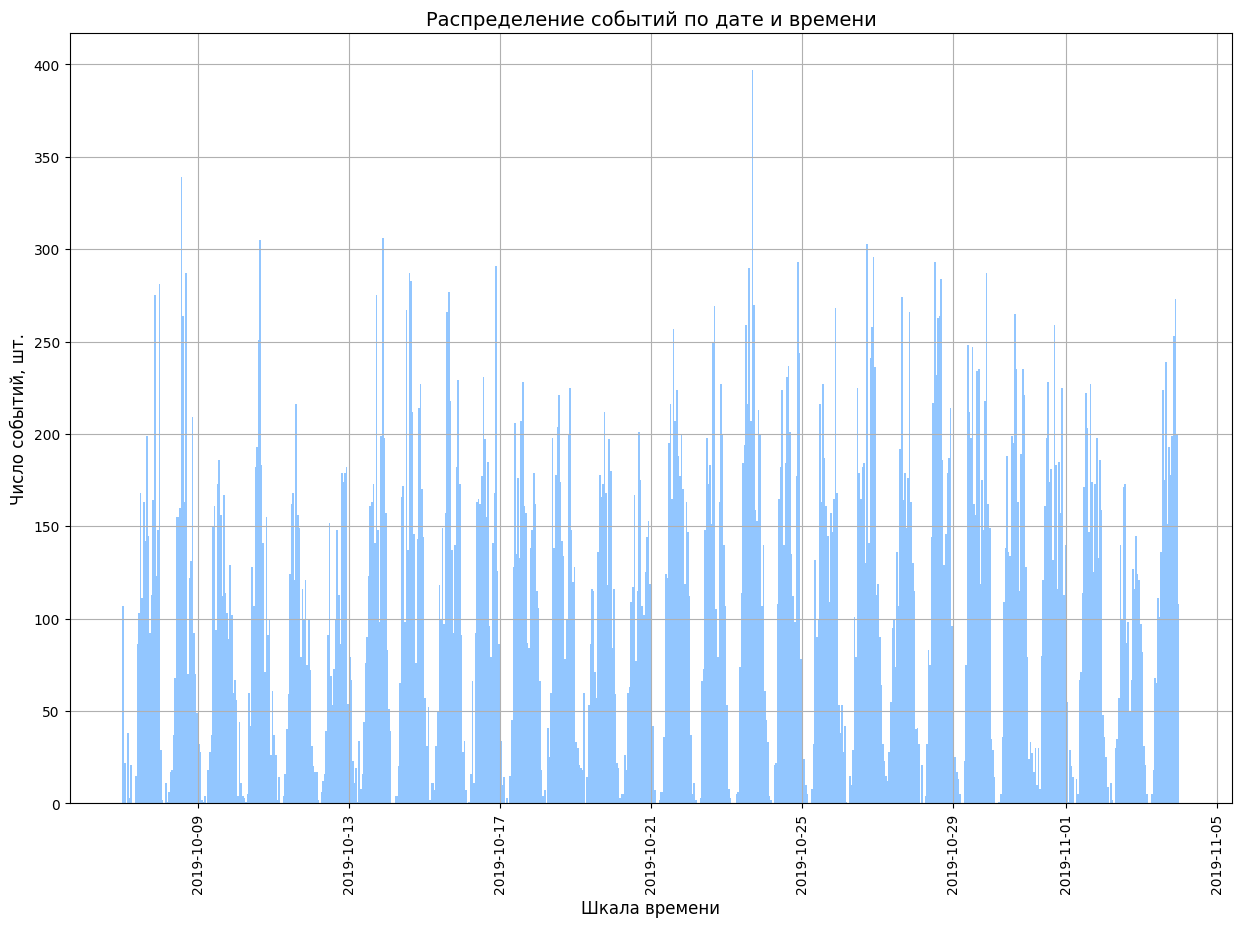

In [22]:
data['event_time'].hist(bins=28*24, xrot=90, figsize=(15,10))
plt.title('Распределение событий по дате и времени', fontsize=14)
plt.xlabel('Шкала времени', fontsize=12)
plt.ylabel('Число событий, шт.', fontsize=12)
plt.show()

**Располагаем данными ровно за 28 дней (с 07.10.2019 по 03.11.2019)**. Из гистограммы видно, что полнота данных за весь период - в целом, одинакова, поэтому ограничивать данные по времени в исследовании не будем.   
Кроме того, можно заметить некоторую периодичность пиковых значений по времени суток, которую рассмотрим подробнее позже.

Оценим общее поведение пользователей через метрики:

####  Retention Rate

Оценим как в целом удерживатся дневные когорты пользователей.    
Поскольку мы заранее определили для каждого пользователя время, когда он совершил первое действие в приложении, можем сразу начать с вычисления лайфтаймов для каждого события в днях. Результаты вычислений будем сохранять в переменную `result_raw`.

In [23]:
# создаем переменную result_raw
result_raw = data.copy()
# отдельно выделим дату первого посещения
result_raw['dt'] = pd.to_datetime(result_raw['first_time']).dt.date

# определяем лайфтайм
result_raw['lifetime'] = ((result_raw['event_time'] - result_raw['first_time']).dt.days)
result_raw['week_lifetime'] = ((result_raw['event_time'] - result_raw['first_time']).dt.days)//7
result_raw.sample(3)

,event_time,event_name,user_id,source,first_time,event_day,event_hour,dt,lifetime,week_lifetime
36183,2019-10-21 21:58:40,tips_show,7366cbbb-9546-4f02-8626-a0e597597f0a,other,2019-10-19 11:57:15,0,21,2019-10-19,2,0
10798,2019-10-11 20:00:14,tips_show,2a45346e-cbdb-47b6-a652-b7d0d2e92391,yandex,2019-10-08 17:51:21,4,20,2019-10-08,3,0
44172,2019-10-24 16:12:12,tips_show,43b5c2b3-b1da-4ed4-88c0-404de977ef41,other,2019-10-10 19:23:30,3,16,2019-10-10,13,1


Построим таблицу удержания `result_grouped`, вычислив размеры когорт и присоединив результат к таблице удержания:

In [24]:
# строим таблицу удержания
result_grouped = result_raw.pivot_table(
    index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
)

# вычисляем размеры когорт
cohort_sizes = (
    result_raw.groupby('dt')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

# объединяем размеры когорт и таблицу удержания
result_grouped = cohort_sizes.merge(
    result_grouped, on='dt', how='left'
)

result_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,204,204.00,25.00,20.00,22.00,11.00,8.00,12.00,16.00,11.00,10.00,10.00,7.00,5.00,12.00,10.00,10.00,10.00,4.00,9.00,5.00,3.00,4.00,7.00,7.00,8.00,9.00,6.00
2019-10-08,167,167.00,27.00,21.00,9.00,7.00,11.00,9.00,12.00,10.00,7.00,10.00,4.00,5.00,6.00,6.00,7.00,5.00,5.00,3.00,8.00,6.00,3.00,4.00,7.00,5.00,4.00,2.00
2019-10-09,176,176.00,13.00,11.00,10.00,12.00,12.00,10.00,13.00,11.00,6.00,4.00,5.00,6.00,10.00,5.00,5.00,2.00,3.00,2.00,5.00,2.00,6.00,2.00,1.00,4.00,3.00,NaN
2019-10-10,174,174.00,16.00,18.00,14.00,17.00,14.00,12.00,9.00,14.00,6.00,6.00,9.00,8.00,7.00,6.00,5.00,9.00,11.00,6.00,5.00,3.00,7.00,3.00,2.00,2.00,NaN,NaN
2019-10-11,136,136.00,12.00,16.00,13.00,12.00,10.00,10.00,6.00,2.00,6.00,5.00,5.00,7.00,5.00,6.00,2.00,9.00,8.00,4.00,3.00,3.00,4.00,4.00,2.00,NaN,NaN,NaN
2019-10-12,125,125.00,16.00,20.00,7.00,8.00,11.00,10.00,11.00,10.00,8.00,8.00,5.00,9.00,6.00,7.00,6.00,4.00,5.00,5.00,3.00,3.00,8.00,4.00,NaN,NaN,NaN,NaN
2019-10-13,148,148.00,19.00,10.00,8.00,10.00,8.00,8.00,7.00,7.00,7.00,6.00,6.00,7.00,7.00,9.00,1.00,1.00,2.00,3.00,2.00,5.00,1.00,NaN,NaN,NaN,NaN,NaN
2019-10-14,185,185.00,21.00,19.00,19.00,15.00,13.00,10.00,8.00,14.00,7.00,7.00,9.00,3.00,12.00,6.00,7.00,9.00,7.00,4.00,3.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-15,186,186.00,26.00,17.00,15.00,10.00,10.00,15.00,14.00,12.00,4.00,7.00,7.00,6.00,7.00,6.00,6.00,6.00,6.00,5.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь  разделим данные таблицы удержания на размеры когорт, на основании полученной таблицы построим тепловую карту:

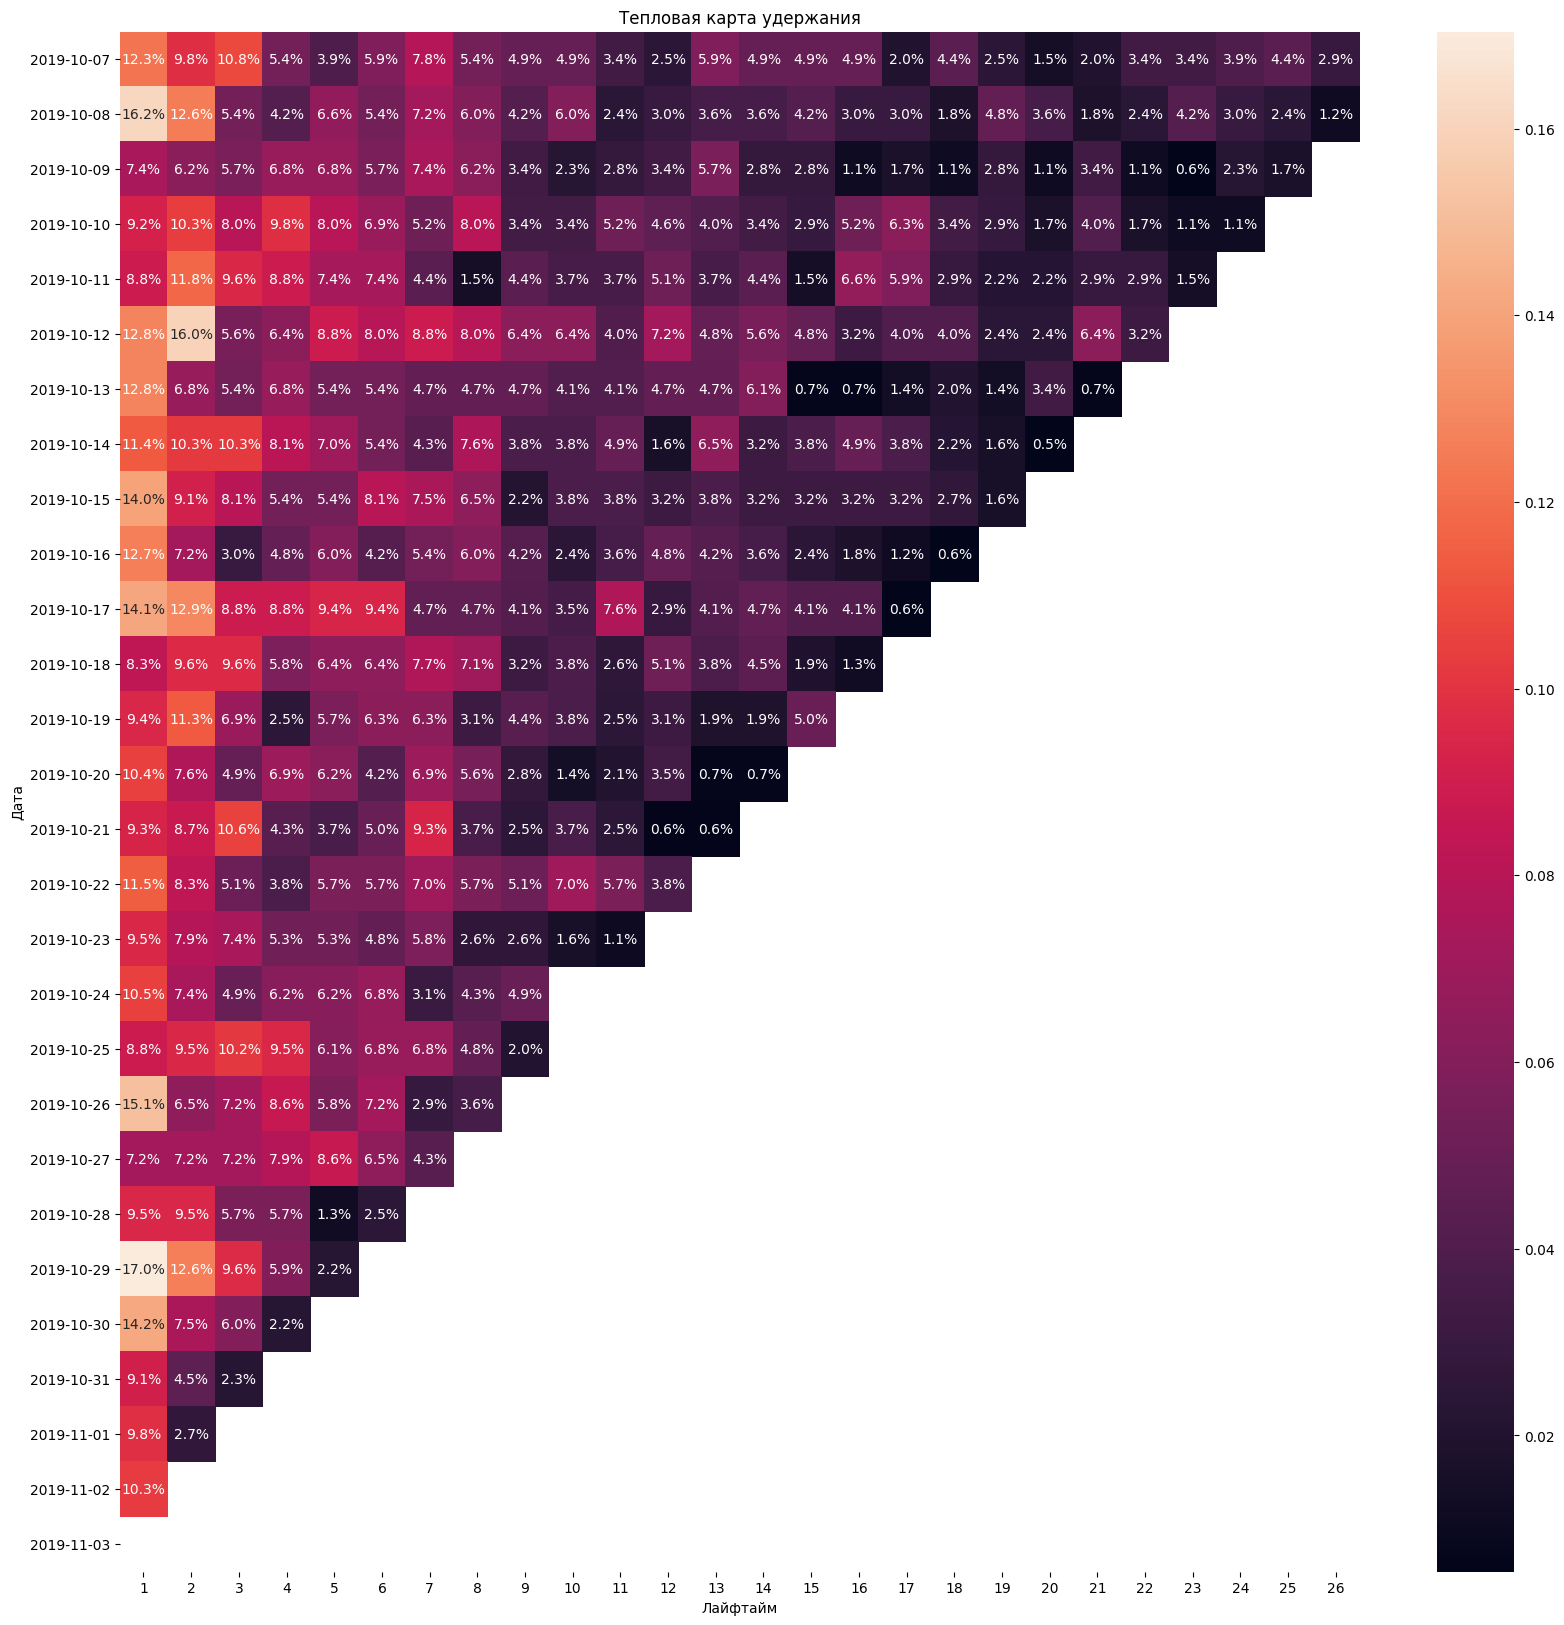

In [25]:
# делим данные таблицы удержания на размеры когорт
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
)

# строим хитмэп без нулевого лайфтайма
plt.figure(figsize=(20, 20))
sns.heatmap(
    result_grouped.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.1%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.xlabel('Лайфтайм')
plt.ylabel('Дата')
plt.show()

"Прожить" 27 дней имели возможность только 2 когорты: от 07.10.2019 и от 08.10.2019. При этом почти все когорты имели возможность прожить 2 дня, поэтому подробнее рассмотрим уровень их удержания. Как правило, **на второй день в приложение возвращается от 7,2% до 17,0% пользователей**. Самое высокое удержание пользователей на второй день после использования отмечается в когортах от 29.10.2019 (RR=17%) и от 08.10.2019 (RR=16.2%).       
Наиболее удерживаемой визуально выглядит когорта от 12.10.2019, ввиду отсутствия темных квадратов в тепловой карте.   
Можно отметить, что, **в целом, пользователи после 8-9 дня удерживаются заметно хуже, чем в предыдущие дни.**       
Довольно, **часто наблюдается резкое снижение коэффициента удержания, за которым сразу следует его увеличение.**        
Считаем важным отметить интересный момент, который проследили в когорте от 11 октября 2019: в первую неделю пользователи удерживаются на хорошем уровне(от 11,8% до 7,4%), затем удержание резко падает до 1,5%, а на следующий день снова резко поднимается примерно на неделю, затем ситуация повторяется еще раз. Можем предположить, что в каждую субботу - 19 октября, 26 октября и 2 ноября для этой когорты произошли какие-то мотивирующие события, повлекшие повышение удержания (например, были проведены дополнительные маркетинговые кампании), в связи с чем, возможно, стоит подробнее изучить совместно с отделом маркетинга какие мероприятия проводились в то время.

---

Для дальнейшего анализа напишем функцию по созданию таблицы удержания `retention_rate_table` и для визуализации удержания в виде хитмапа функцию `retention_rate_heatmap`

In [26]:
def retention_rate_table (df, lifetime):
    """
    Возвращает таблицу удержания пользователей.   
    На вход принимает датафрейм, по которому необходимо рассчитать удержание и признак, который означает лайфтайм
   
    """
    #  строим таблицу удержания
    result_grouped = df.pivot_table(index=['dt'], columns=lifetime, values='user_id', aggfunc='nunique')
    
    # вычисляем размеры когорт
    cohort_sizes = (df.groupby('dt').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))
    
    # объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(result_grouped, on='dt', how='left')
    
    # делим данные таблицы удержания на размеры когорт
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0).fillna(0)
    
    return result_grouped 

In [27]:
def retention_rate_heatmap(df, title):
    """
    Возвращает тепловую карту удержания.   
    На вход принимает рассчитанную таблицу удержания пользователей, и наименование графика, которое нужно отразить
   
    """
    # строим хитмэп без нулевого лайфтайма
    plt.figure(figsize=(15, 8))
    sns.heatmap(
    df.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.1%',  # переводим значения в проценты
)
    plt.title(title)  # название графика
    plt.xlabel('Лайфтайм')
    plt.ylabel('Дата первого использования')
    plt.show()

---

Предположим, что лайфтайм равен не 1, а сразу 7 дням, то есть будем оценивать сколько целых недель прожил пользователь в приложении. Получим следующую тепловую карту:

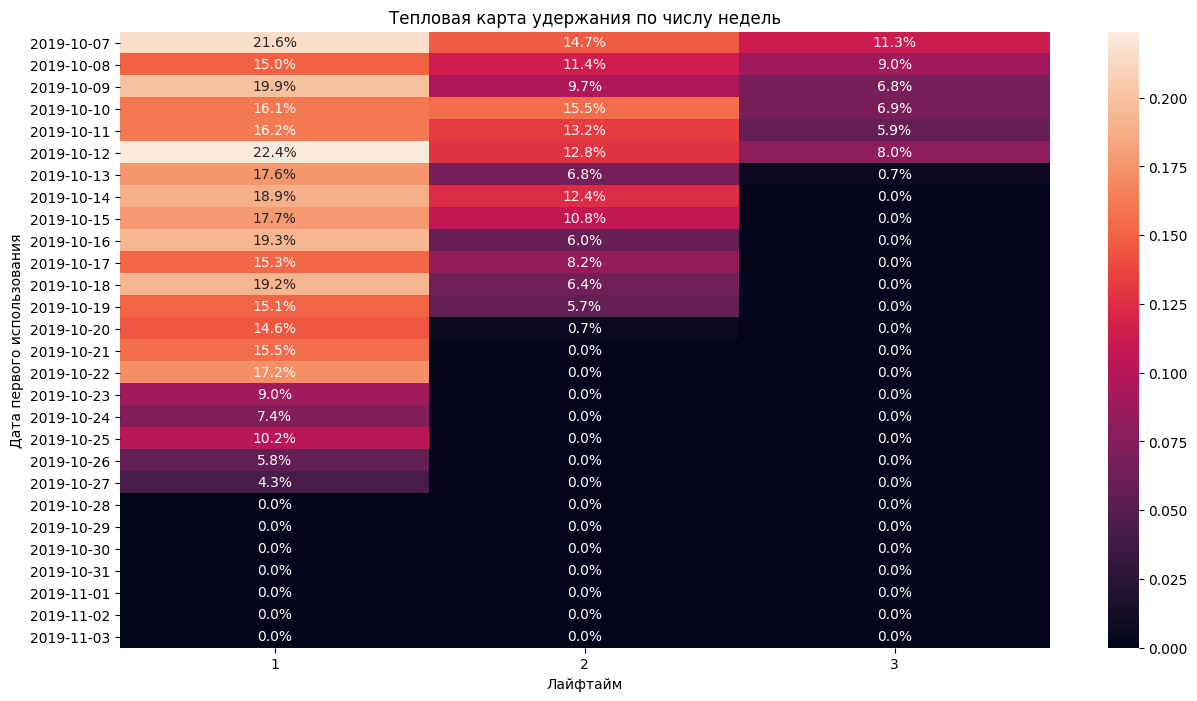

In [28]:
# строим таблицу удержания с помощью функции retention_rate_table
result_grouped_week = retention_rate_table(result_raw, result_raw['week_lifetime'])

# строим хитмап с помощью функции retention_rate_heatmap
retention_rate_heatmap(result_grouped_week, 'Тепловая карта удержания по числу недель')

"Захватить" дни на второй неделе смогли не все когорты, а только те, которые пришли в приложение с 07.10.2019 по 27.10.2019. Дни из всех 4 недель "захватили" только когорты от 07.10.2019 по 12.10.2019.  
Из тепловой карты видно, **что пользователи на второй неделе удерживаются лучше, чем на третьей, а на третьей неделе - лучше, чем на четвертой.**  Мощными по удержанию выглядят когорты от 07.10.2019 и когорта от 12.10.2019, не смотря на то, что у последней не было возможности "прожить" столько же дней сколько у первой и сравнивать их не совсем корректно.

Считаем разумным посмотреть на линейном графике как изменялось удержание пользователей в динамике. С целью избавить график от "шума" оценим удержание только на 2, 7, 14 и 21 день:

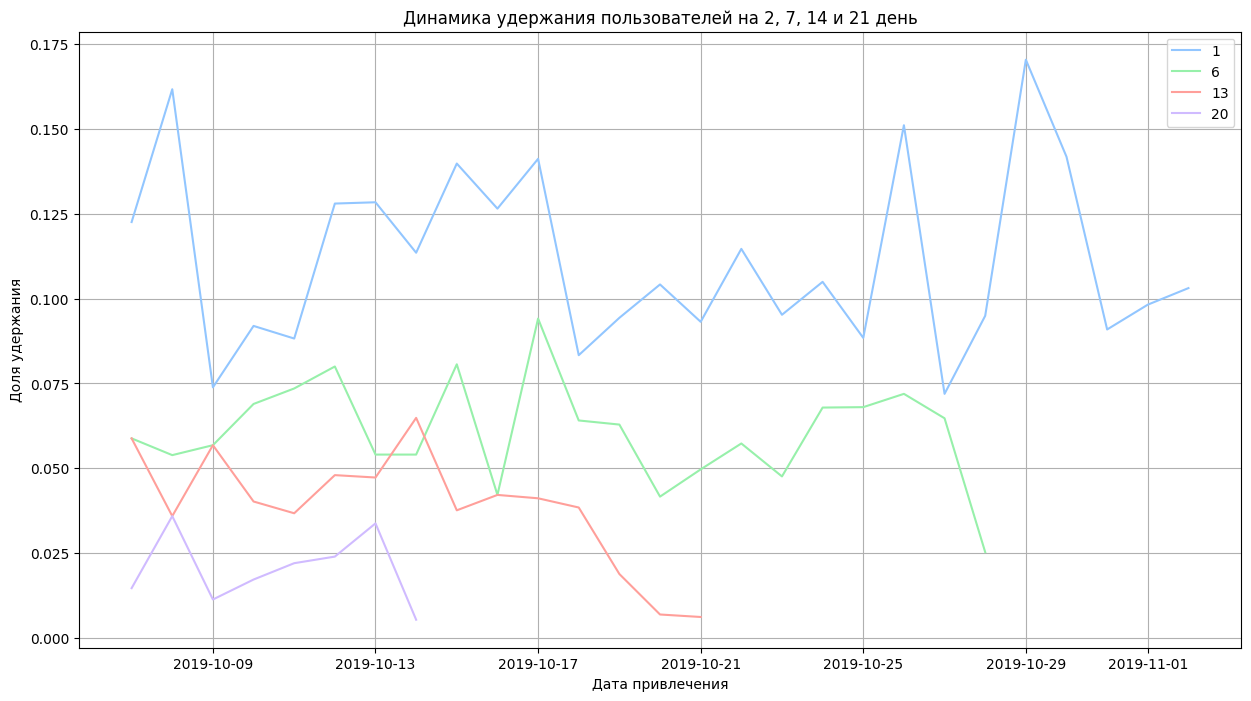

In [29]:
# строим графики изменений

# удаление столбца cohort_size 
report = result_grouped.drop(columns=['cohort_size', 0])

result_grouped[[1,6,13,20]].plot(grid=True, figsize=(15,8))
plt.xlabel('Дата привлечения')
plt.ylabel('Доля удержания')
plt.title('Динамика удержания пользователей на 2, 7, 14 и 21 день')
plt.show()

На графике динамики, в целом, видно **постоянное снижение удержания пользователей: наиболее удерживаемыми являются пользователи на  второй день**, хуже удерживаются пользователи на 7 день. Еще хуже - на 14 (но стоит отметить, что несколько когорт на 14 день продемонстрировали такой же результат, как и на седьмой, а когорта от 14.10.2019 показала удержание выше, чем на седьмой день), в связи с этим было бы неплохо выяснить какие маркетинговые кампании проводились накануне или были введены новшества в приложении, поскольку в хитмапе 13.10.2019 у этой когорты было явное снижение удержания, которое может оказаться неслучайным.  
Самый плохой результат показывают пользователи на 21 день. 

#### Время, проведённое в приложении

Оценим сколько дней пользователи проводят в приложении. Для этого создадим сводную таблицу `number_of_days`, в которой соберем информацию о времени первого визита пользователя, о времени последнего события пользователя и о числе дней, проведенных в приложении:

In [30]:
# выделим отдельно дату
data['event_date']=data['event_time'].dt.date
# выделяем минмальные и максимальные значения даты у каждого пользователя
number_of_days = data.groupby('user_id').agg({'event_date':['min', 'max']}).reset_index()
# переименовываем столбцы
number_of_days.columns = ['user_id', 'min_date', 'max_date']
# вычисляем число дней в приложении
number_of_days['number_of_days'] = ((number_of_days['max_date'] - number_of_days['min_date']).dt.days) + 1
number_of_days.head()

,user_id,min_date,max_date,number_of_days
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-22,16
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-11-03,16
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01,2019-11-01,1
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18,2019-10-31,14
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25,2019-10-29,5


Оценим как распределились пользователи по числу дней, проведенных в приложении:

Описание данных:

count   4293.00
mean       3.61
std        5.19
min        1.00
25%        1.00
50%        1.00
75%        4.00
max       28.00
Name: number_of_days, dtype: float64


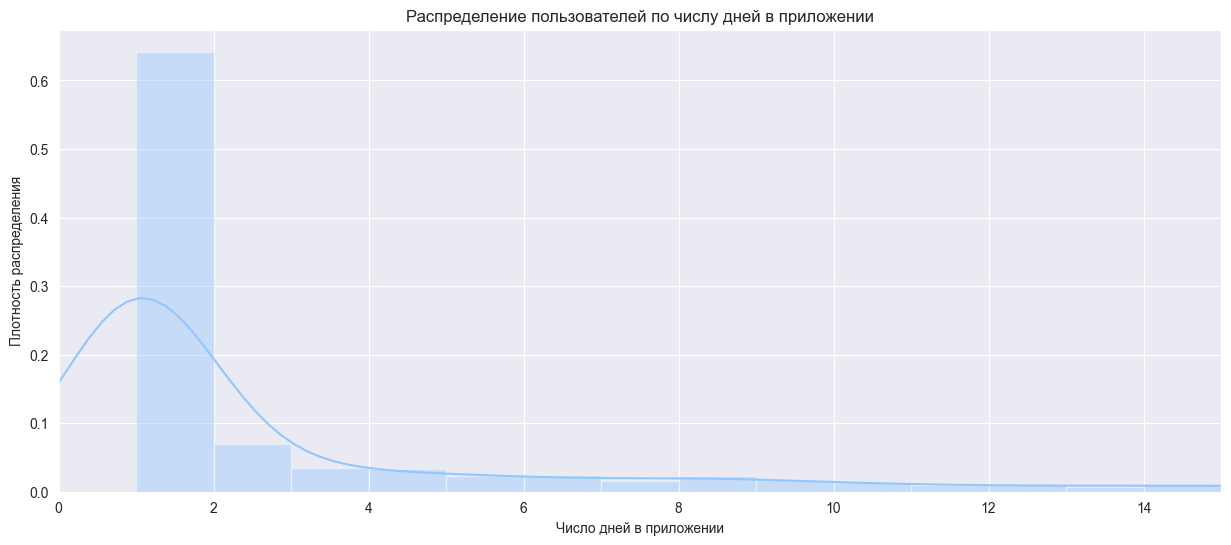

In [31]:
# выведем описательные статистики
print('Описание данных:')
print('')
print(number_of_days['number_of_days'].describe())

#построим график плотности распределения пользователей по дням в приложении
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))
sns.distplot(number_of_days['number_of_days'], bins=27)
plt.title('Распределение пользователей по числу дней в приложении')
plt.xlabel('Число дней в приложении')
plt.ylabel('Плотность распределения')
plt.xlim(0,15)
plt.show()

В среднем, пользователи проводят в приложении 3-4 дня, в то время как половина пользователей "живет" в приложении не более 1 дня.         
Минимальное число дней в приложении - 1, максимальное - 28.              
Наиболее характерными для совокупности являются пользователи, проводящие в приложении до 5 дней.    

Настораживает то, что **у половины изучаемой совокупности число дней, проведенных в приложении не превышает одного**: либо пользователи так быстро находят то, что искали и совершают покупку, либо они сталкиваются с какой-то проблемой и выходят из приложения. Постараемся понять во время изучения пользовательских сессий.    
Постоянных пользователей, которые совершают действия в приложении почти ежедневно - очень мало и они, скорее, похожи на выбросы, которые и смещают среднее значение.       

In [32]:
# проверим какой % пользователей выходит из приложения в день регистрации
print( '{0:.1%}'.format(len(number_of_days[number_of_days['number_of_days']==1])/number_of_days.shape[0]))

64.2%


**Лишь 36% пользователей возвращаются в приложение на другой день после регистрации**

Чтобы оценить сколько времени пользователь проводит в приложении, выделим сессии пользователя.  

*Пользовательская сессия — набор действий пользователя, выполняемый от открытия приложения до окончания его использования*. 
С учетом специфики продукта и с практической точки зрения полагаем, что продолжительность сессии в 30 минут кажется оптимальной: за это время пользователь может сравнить товары, выбрать необходимый и совершить целевое действие. Как правило, пользователи подобных приложений заранее представляют конечный результат, который им примерно нужен, поэтому слишком много времени на поиск товара не должно уходить. Конечно, продолжительность сессии у каждого пользователя разная и зависит от его индивидуальных особенностей и от особенностей выбираемого товара - но, в среднем, этого времени должно хватить на покупку 1 товара.   

Таким образом, в рамках исследования будем считать, что если разница между событиями пользователя составляет 30 минут, то такое событие отнесем к новой сессии.

In [33]:
#отсортируем датасет по пользователю и времени событиия
data = data.sort_values(['user_id', 'event_time']).reset_index(drop=True)
data.head(15)

,event_time,event_name,user_id,source,first_time,event_day,event_hour,event_date
0,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07
1,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07
2,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07
3,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07
4,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07
5,2019-10-07 13:45:43,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07
6,2019-10-07 13:46:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07
7,2019-10-07 13:47:32,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07
8,2019-10-07 13:49:41,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07
9,2019-10-09 18:33:55,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,2,18,2019-10-09


Выделяем сессии:

In [34]:
# определяем разницу в 30 минут
difference = (data.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()

# создаем счетчик и сохраняем результат в столбец session_id
data['session_id'] = data.groupby(['user_id', difference], sort=False).ngroup() + 1
data.head(15)

,event_time,event_name,user_id,source,first_time,event_day,event_hour,event_date,session_id
0,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07,1
1,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07,1
2,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07,1
3,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07,1
4,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07,1
5,2019-10-07 13:45:43,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07,1
6,2019-10-07 13:46:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07,1
7,2019-10-07 13:47:32,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07,1
8,2019-10-07 13:49:41,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,0,13,2019-10-07,1
9,2019-10-09 18:33:55,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,2,18,2019-10-09,2


Посмотрим на некоторые характеристики полученных сессий:

Число уникальных сессий всего: 10368
Число сессий на одного пользователя: 2.4

Минимальное число сессий у одного пользователя: 1
Максимальное число сессий у одного пользователя: 99


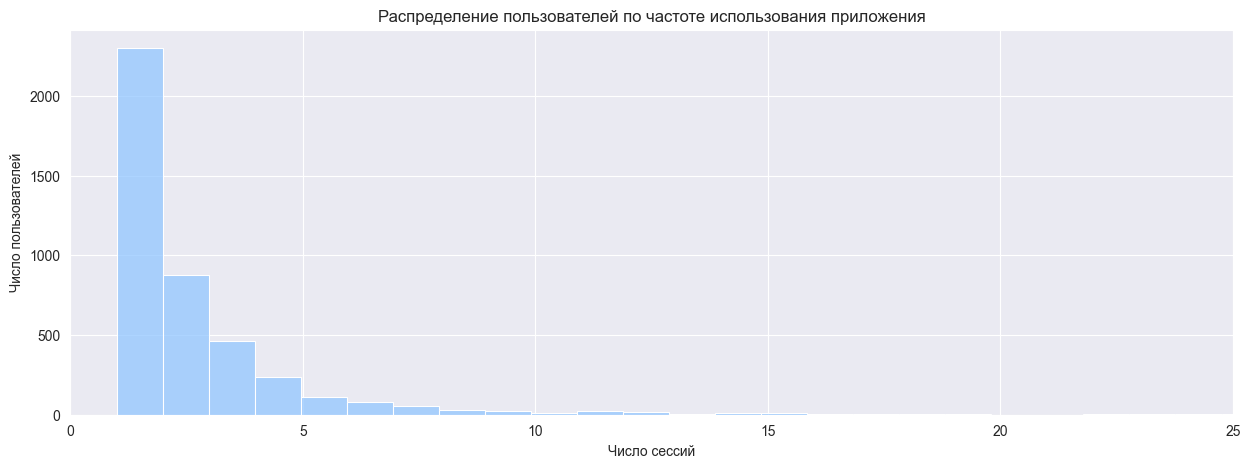

In [35]:
# проверим сколько уникальных сессий получилось
print('Число уникальных сессий всего: {}'.format(data['session_id'].nunique()))
# рассчитаем сколько сессий приходится на одного пользователя
print('Число сессий на одного пользователя: {0:.1f}'.format(data['session_id'].nunique()/data['user_id'].nunique()))
print('')
#выведем какое минимальное число сессий совершено пользователями
print('Минимальное число сессий у одного пользователя: {}'.format(data.groupby('user_id')['session_id'].nunique().min()))
#выведем какое максимальное число сессий совершено пользователями
print('Максимальное число сессий у одного пользователя: {}'.format(data.groupby('user_id')['session_id'].nunique().max()))

#построим график распределения пользователей по частоте пользовательских сессий
plt.figure(figsize=(15, 5))
sns.histplot(x='session_id', data=data.groupby('user_id').agg({'session_id':'nunique'}), bins=99)
plt.xlabel('Число сессий')
plt.ylabel('Число пользователей')
plt.title('Распределение пользователей по частоте использования приложения')
plt.xlim(0,25)
plt.show()

Пользователи совершали от 1 до 99 сессиий. **В среднем на одного пользователя приходится 2,4 сессии.**    
Наиболее часто можно встретить пользователя с 1 или 2 сессиями. Пользователи с числом сессий более 8 не являются характерными для совокупности.

Проверим как распределится число  событий в сессии:

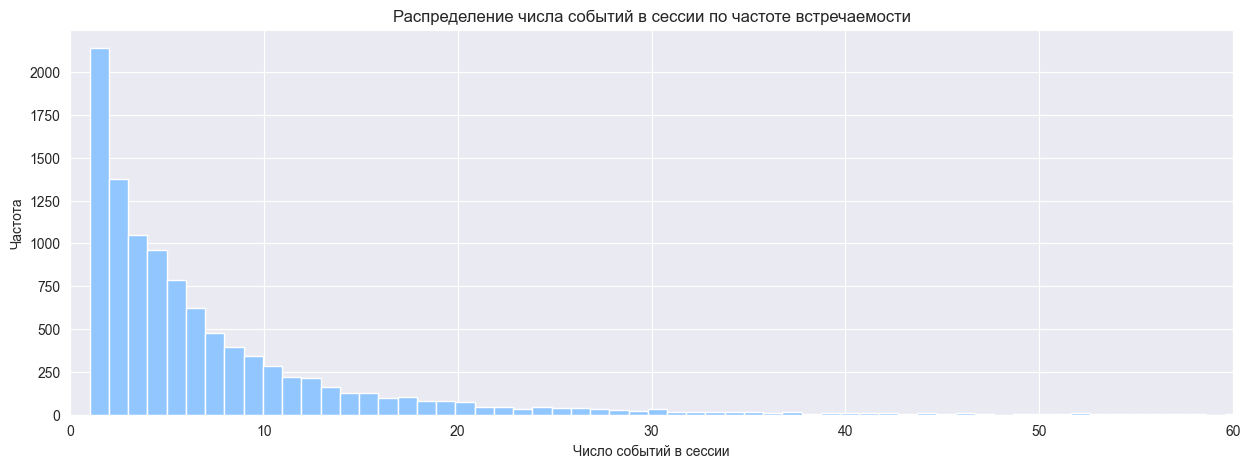

In [36]:
# строим гистограмму
data.groupby('session_id').agg({'event_name':'count'}).hist(bins=149, figsize=(15, 5))
plt.xlabel('Число событий в сессии')
plt.ylabel('Частота')
plt.title('Распределение числа событий в сессии по частоте встречаемости')
plt.xlim(0,60)
plt.show()

**Большая часть сессий состоит из цепочки событий.** Из одного события состоит примерно 20% сессий.

Создадим переменную `session_time`, в которой сохраним информацию о каждой сессии пользователя: начало сессии `begining`, ее окончание `ending` и продолжительность сессии `session_duration`:

In [37]:
# выделяем минмальные и максимальные значения времени каждой сессии у каждого пользователя 
session_time = data.groupby(['user_id', 'session_id']).agg({'event_time':['min', 'max']}).reset_index()

# переименовываем столбцы
session_time.columns = ['user_id', 'session_id', 'begining', 'ending']

# вычисляем продолжительность сессии session_duration
session_time['session_duration'] = session_time['ending'] - session_time['begining']
session_time.head(10)

,user_id,session_id,begining,ending,session_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45,2019-10-07 13:49:41,0 days 00:09:56
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55,2019-10-09 18:42:22,0 days 00:08:27
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30,2019-10-21 20:07:30,0 days 00:15:00
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14,2019-10-22 11:30:52,0 days 00:12:38
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,2019-10-19 21:34:33,2019-10-19 21:59:54,0 days 00:25:21
5,00157779-810c-4498-9e05-a1e9e3cedf93,6,2019-10-20 18:49:24,2019-10-20 20:05:36,0 days 01:16:12
6,00157779-810c-4498-9e05-a1e9e3cedf93,7,2019-10-24 10:50:40,2019-10-24 10:57:12,0 days 00:06:32
7,00157779-810c-4498-9e05-a1e9e3cedf93,8,2019-10-29 21:18:24,2019-10-29 22:10:25,0 days 00:52:01
8,00157779-810c-4498-9e05-a1e9e3cedf93,9,2019-10-30 07:50:45,2019-10-30 08:26:53,0 days 00:36:08
9,00157779-810c-4498-9e05-a1e9e3cedf93,10,2019-11-03 17:12:09,2019-11-03 17:12:09,0 days 00:00:00


Выведем описательную статистику:

In [38]:
session_time['session_duration'].describe()

count                        10368
mean     0 days 00:12:52.672935956
std      0 days 00:19:51.613451145
min                0 days 00:00:00
25%                0 days 00:00:21
50%                0 days 00:05:35
75%                0 days 00:17:26
max                0 days 05:21:59
Name: session_duration, dtype: object

У половины сессий продолжительность не превышает 5 минут 35 секунд.    
Самая длинная сессия сотавила почти 5,5 часов.   
Интересно, что есть пользователи, которые проводят в приложении 0 секунд. Проверим сколько таких сессий всего и сколько пользователей совершили такие сессии:

In [39]:
# сохраняем нулевые сессии
zero = session_time[session_time['session_duration'] == '0 days 00:00:00']

# выводим характеристики
print('')
print('СЕССИИ ПРОДОЛЖИТЕЛЬНОСТЬЮ МЕНЕЕ 1 СЕКУНДЫ:') 
print('')
print('Число сессий:', zero.shape[0], 'шт., или','{0:.1%}'.format(zero.shape[0]/session_time.shape[0]),'от общего числа сессий')
print('Число пользователей, совершивших такие сессии:', zero['user_id'].nunique(), 
      'чел., или','{0:.1%}'.format(zero['user_id'].nunique()/data['user_id'].nunique()),'от общего числа пользователей')


СЕССИИ ПРОДОЛЖИТЕЛЬНОСТЬЮ МЕНЕЕ 1 СЕКУНДЫ:

Число сессий: 2145 шт., или 20.7% от общего числа сессий
Число пользователей, совершивших такие сессии: 1125 чел., или 26.2% от общего числа пользователей


**Почти каждая пятая сессия является нулевой (20,7% всех сессий). 26,2% пользователей приложения совершали такие сессии.** Чтобы разобраться с их природой, проверим какие действия совершали пользователи во время таких сессий. Для этого отберем из датасета данные сессии и посмотрим какие события совершались:

In [40]:
# создаем список id нулевых сессий
zero_session_list = list(zero['session_id'])

# фильтруем исходный датасет по данному списку
data_zero = data[data['session_id'].isin(zero_session_list)]

In [41]:
# находим какие виды событий и в каком объеме совершаются во время нулевых сессий
group_event_zero = (
    data_zero.groupby('event_name').agg({'user_id':'count'})
    .reset_index()
    .rename(columns={'user_id':'quantity'})
    .sort_values(by = 'quantity', ascending=False)
)

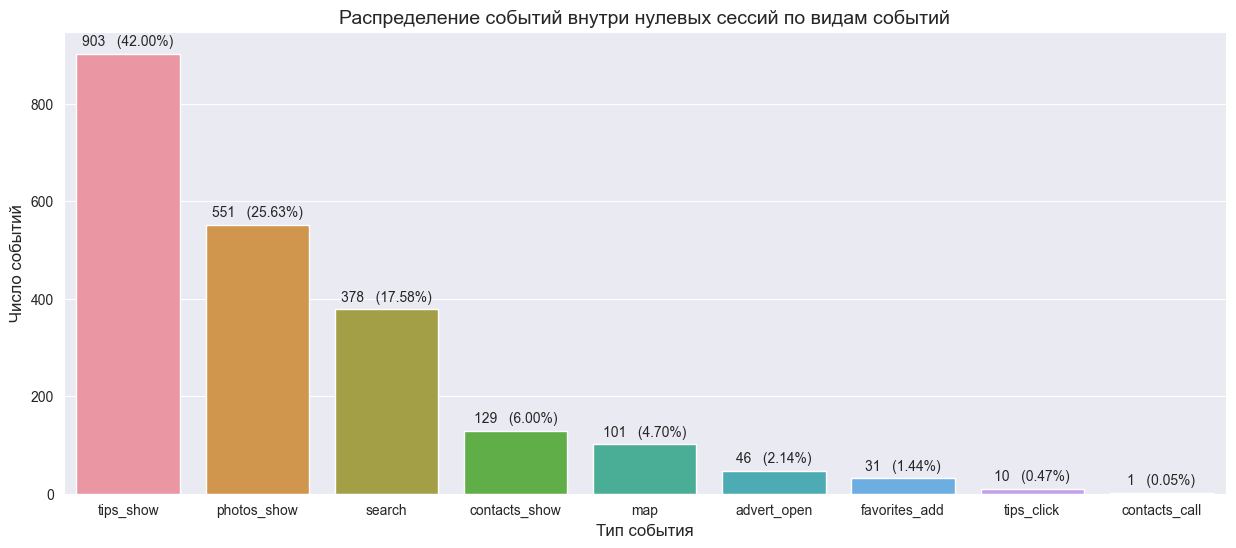

In [42]:
# cтроим столбчатую диаграмму по видам событий, которые совершаются во время нулевых сессий

plt.figure(figsize=(15, 6))
ax = sns.barplot(x='event_name', y='quantity', data=group_event_zero) 

# выведем значение каждого столбика в абсолютном выражении и в % от общего числа нулевых событий
for p in ax.patches:
    ax.annotate('{:.0f}   ({:.2%})'.format(p.get_height(), p.get_height()/group_event_zero['quantity'].sum()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_title('Распределение событий внутри нулевых сессий по видам событий', fontsize=14)
ax.set_xlabel('Тип события', fontsize=12)
ax.set_ylabel('Число событий', fontsize=12)
plt.show()

In [43]:
# проверим в какие даты совершались нулевые сессии
data_zero['event_date'].describe()

count           2150
unique            28
top       2019-10-30
freq             114
Name: event_date, dtype: object

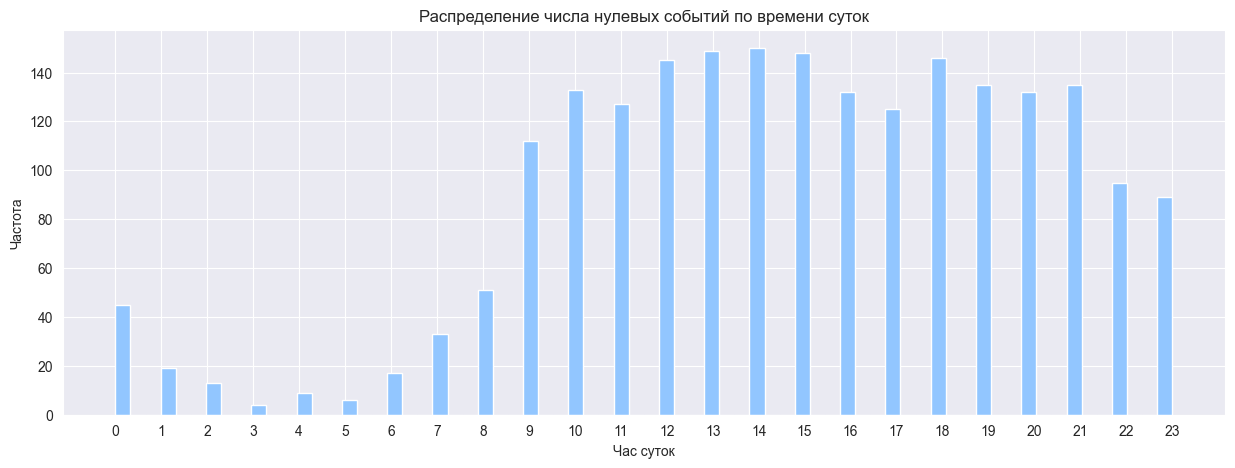

In [44]:
# посмотрим как нулевые сессии связаны с временем суток
data_zero['event_time'].dt.hour.hist(bins=70, figsize=(15,5))
plt.xlabel('Час суток')
plt.ylabel('Частота')
plt.title('Распределение числа нулевых событий по времени суток')
plt.xticks(range(0, 24))
plt.show()

Стоит отметить, что нулевые события происходили во все исследуемые дни, чаще всего 30 октября 2019. С временем суток они тоже не связаны, единственное, что можно отметить: ночью таких событий происходило намного меньше, чем днем, что можно объяснить спецификой использования приложения: вероятно, в ночное время пользователей физически меньше, чем днем.    

Итак, **в нулевых сессиях пользователи совершали все виды событий**, что намекает, скорее, на наличие технического сбоя.    
Как выяснили, по общему правилу, сессия состоит из цепочки событий.   
Событие tips_show является автоматическим и не зависит от действий пользователя, поэтому на его совершение, возможно, достаточно менее 1 секунды, но на совершение остальных событий - такое время кажется не реалистичным, тем более на совершение цепочки из событий.     
Не исключаем, что пользователь мог совершить одно действие и отвлечься на время, превышающее 30 минут, но доля таких сессий кажется слишком высокой. Возможно, проблема возникла на этапе записи данных или их сбора, поэтому для оценки времени, проведенного в приложении исключим нулевые сессии и посмотрим на описательные статистики.


In [45]:
# исключаем нулевые сессии
session_time_not_null = session_time[session_time['session_duration'] != '0 days 00:00:00']
session_time_not_null['session_duration'].describe()

count                         8223
mean     0 days 00:16:14.227532530
std      0 days 00:21:02.537538706
min                0 days 00:00:01
25%                0 days 00:03:10
50%                0 days 00:09:19
75%                0 days 00:21:37
max                0 days 05:21:59
Name: session_duration, dtype: object

Без учета нулевых сессий среднее время сессии увеличилось  с 12 до 16 минут. С целью сгладить влияние выбросов среднее время будем оценивать по медиане. Таким образом, **в среднем, пользовательская сессия длится около 9 минут.**

#### Частота действий

Оценим каких событий больше в датасете. Для этого сгруппируем данные по названию событий, найдем число событий в каждой группе и рассчитаем долю событий,  построим столбчатую диаграмму.

,event_name,quantity,unique_users,share
8,tips_show,39907,2801,0.55
5,photos_show,9352,1095,0.13
6,search,6765,1666,0.09
0,advert_open,6146,751,0.08
2,contacts_show,4376,981,0.06
4,map,3749,1456,0.05
3,favorites_add,1414,351,0.02
7,tips_click,811,322,0.01
1,contacts_call,534,213,0.01


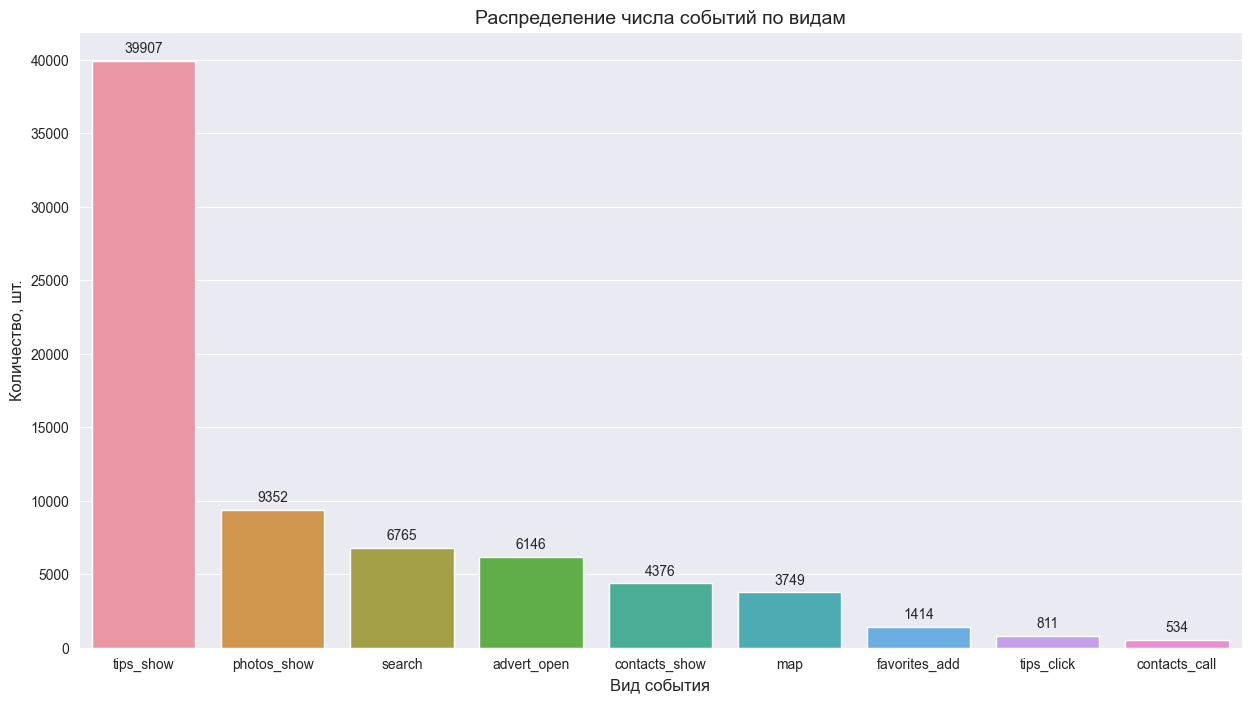

In [46]:
# группируем данные
event_name = (
    data
    .groupby('event_name').agg({'user_id':['count', 'nunique']})
    .reset_index()
    .sort_values(by=(   'user_id',   'count'), ascending = False)
)
event_name.columns = ['event_name', 'quantity', 'unique_users']
# рассчитываем долю
event_name['share'] = event_name['quantity']/event_name['quantity'].sum()
display(event_name)

# строим столбчатую диаграмму:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='event_name', y='quantity', data=event_name) 
ax.set_title('Распределение числа событий по видам', fontsize=14)
ax.set_xlabel('Вид события', fontsize=12)
ax.set_ylabel('Количество, шт.', fontsize=12)
annotate (ax, '.0f') # подпишем столбики с помощью функции
plt.show()

**Более половины событий (55%) - это событие tips_show (пользователь увидел рекомендованные объявления)**, которое, скорее, является автоматическим и напрямую не связано с действиями пользователя и оно не означает, что сам пользователь хотел это увидеть. Вероятно, открыв главную страницу приложения, пользователь автоматически попадает на страницу с рекомендованными объявлениями.  В таком случае лучше оценивать сколько пользователей именно заинтересовалось такими предложениями, то есть кликнуло по рекомендованному объявлению (tips_click).      
Но стоит обратить внимание, что не все пользователи (а только около 65 %) видели рекомендованные объявления, вероятно, они сразу попали на нужную страницу приложения, например из поисковой системы интернет, минуя рекомендации.

**Среди остальных событий наиболее часто пользователи просматривают фотографии (9352 раза или 13% всех событий). Поиск по сайту и открытие карточки объявления совершается примерно в равных долях (9% и 8%, соответственно).** Интересно, что поиск по сайту не второй по популярности, после рекомендаций. Возможно, это связано с тем,  что пользователи пересматривают фотографии заинтересовавшего товара несколько раз с целью не упустить детали и сравнить товары между собой, а также показ рекомендаций приносит свою пользу и пользователи просматривают фотографии в них.   
Целевое событие "просмотр контактов" совершилось 4376 раз, что составляет 6% от общего числа событий.     



Отследим динамику измениний числа событий по дням по каждому виду событий:

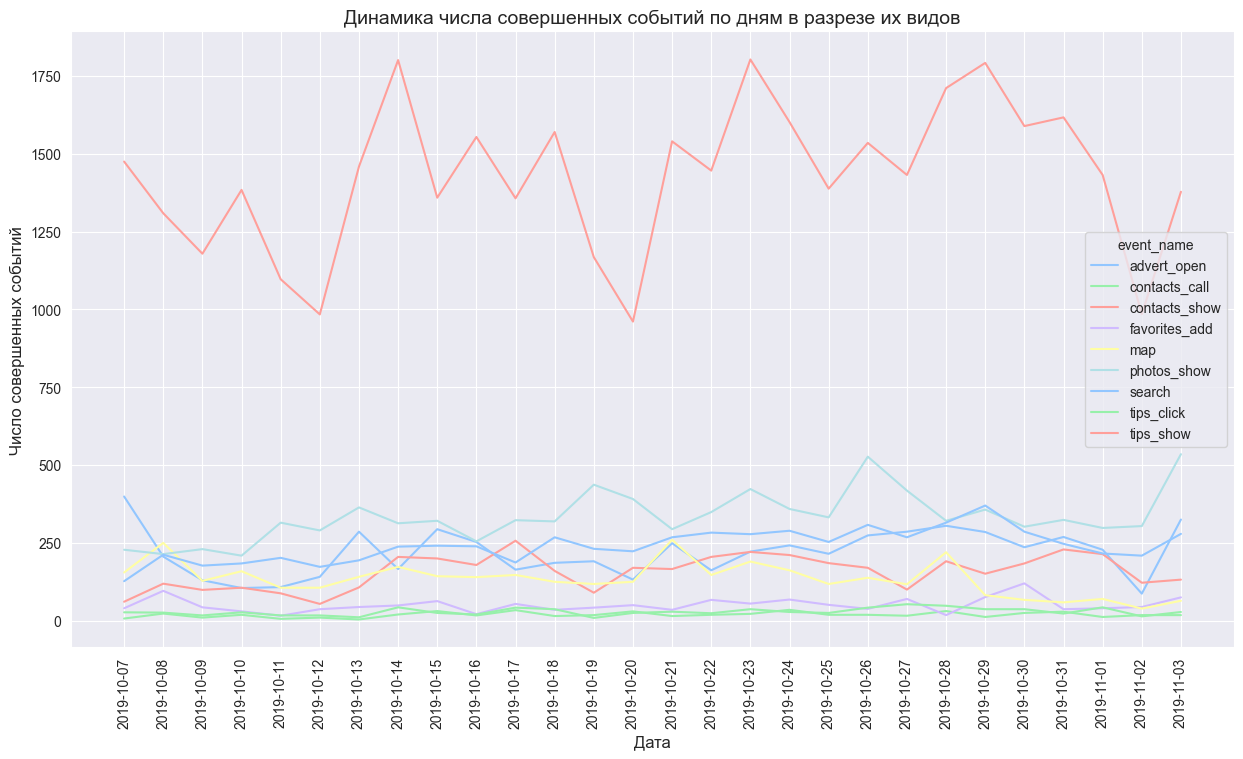

In [47]:
#строим линейный график
(
    data
    .pivot_table(index='event_date', columns='event_name', values='user_id', aggfunc='count')
    .plot(figsize = (15,8), rot=90)
) 
plt.title('Динамика числа совершенных событий по дням в разрезе их видов', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Число совершенных событий', fontsize=12)
plt.xticks(ticks=list(data['event_date'].unique()))
plt.show()

В целом, динамика событий по дням только подтверждает общую ситуацию. На протяжении всего периода времени событие tips_show превосходит любое другое событие по числу совершения в несколько раз. Что касается остальных событий, то почти постоянно лидирует событие "просмотр фотографий" за редкими исключениями. И, в целом, показатели по ним подвержены небольшим ежедневным колебаниям.     
Реже всего пользователи совершают клики по рекомендованным объявлениям, совершают звонок или добавляют объявления в избранное - на протежении всего периода эти показатели стабильно низкие, за небольшими исключениями.

Рассчитаем сколько в среднем событий происходит в день с учетом события tips_show и без него:

In [48]:
print('Ежедневно, в среднем, происходит {:.0f} событий'
      .format(data.groupby(['event_date'], as_index=False).agg({'event_name': 'count'}).event_name.mean()))
print('Ежедневно, в среднем без события tips_show происходит {:.0f} события'
      .format(
          data[data['event_name']!="tips_show"].groupby(['event_date'], as_index=False).agg({'event_name': 'count'})
          .event_name.mean())
     )

Ежедневно, в среднем, происходит 2609 событий
Ежедневно, в среднем без события tips_show происходит 1184 события


В начале исследования увидели, что события происходят с некоторой периодичностью. В связи с этим считаем необходимым рассмотреть распределение числа совершенных событий по времени суток:

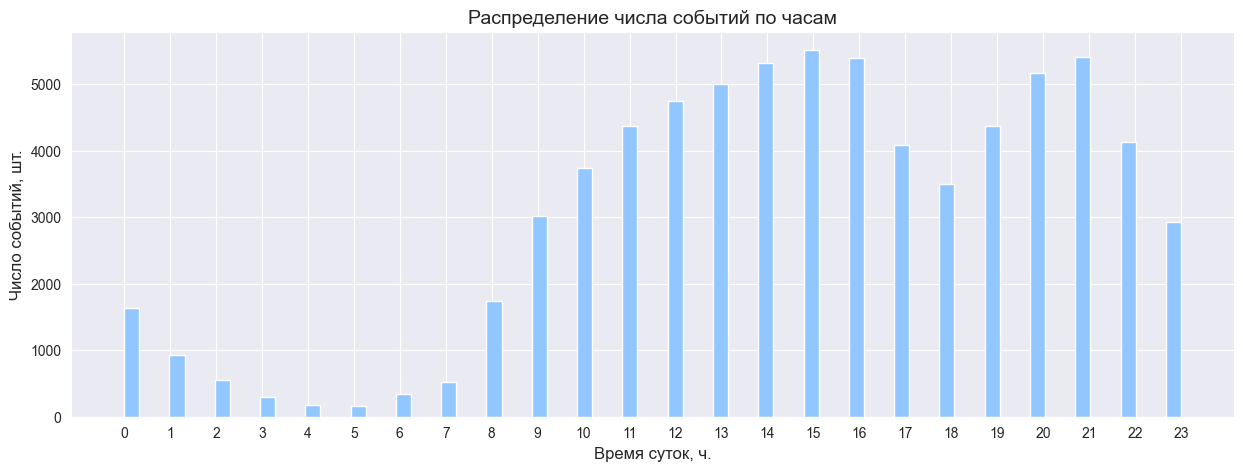

In [49]:
data['event_time'].dt.hour.hist(bins=70, figsize=(15,5))
plt.title('Распределение числа событий по часам', fontsize=14)
plt.xlabel('Время суток, ч.', fontsize=12)
plt.ylabel('Число событий, шт.', fontsize=12)
plt.xticks(range(0, 24))
plt.show()

Действительно, **совершение событий происходит неравномерно: в ночные часы пользователи менее активны**. Активность пользователей находится на пике в 14-16 часов и в 20-21 час. Возможно, это может стать основанием для сегментации пользователей на следующем шаге анализа.

Проверим как события распределяются по дням недели:

In [50]:
(data.groupby('event_day').agg({'event_name':'count'})
 .sort_values(by='event_name', ascending=False)
 .rename(columns={'event_name':'number_of_events'}))

,number_of_events
event_day,
0,11543
1,10996
2,10788
3,10618
6,10311
4,9809
5,8989


Явной взаимосвязи между днем недели и количеством совершенных событий не прослеживается, в целом число событий примерно соизмеримо, но можно отметить, что **в пятницу и в субботу пользователи менее активны, чем в остальные дни.**    
Больше всего событий приходится на понедельник.

Оценим в каком объеме пользователи пришли в приложение из разных источников и как источники влияют на число совершенных событий.

In [51]:
data.groupby('source').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)

,user_id
source,
yandex,1934
other,1230
google,1129


**Больше всего приложение пользователями обеспечивает источник "Яндекс" - 45% пользователей (1934 человека).**     
26% пользователей (1129 человек) пришли в приложение из источника "Гугл", еще 29% пользователей (1230 человек) оказались в приложении благодаря остальным источникам. 

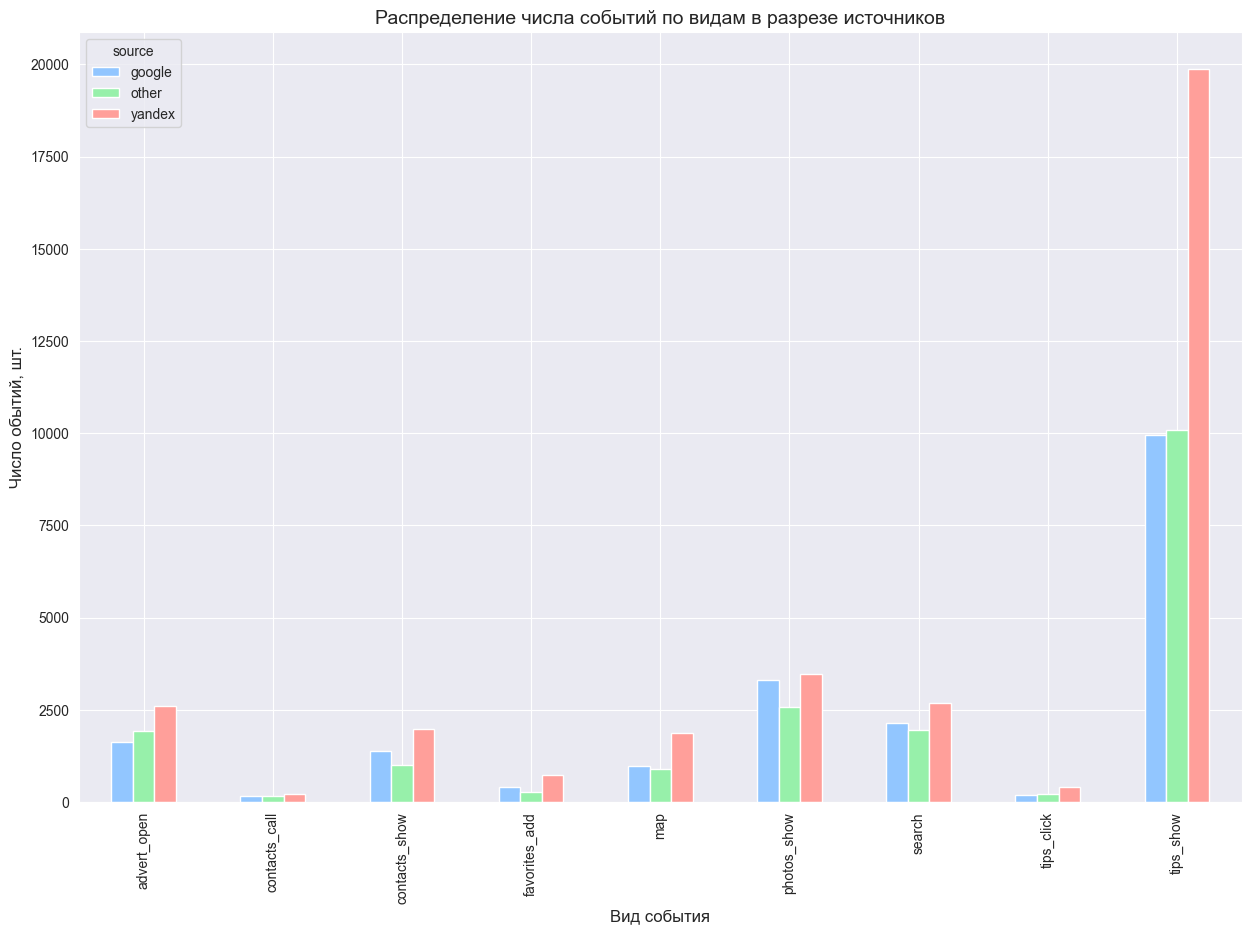

In [52]:
# строим диаграмму числа событий в разрезе источников
ax = (
    data.pivot_table(index=['event_name'], columns='source', values = 'user_id', aggfunc='count')
    .plot(kind='bar', figsize=(15,10))
)
ax.set_title('Распределение числа событий по видам в разрезе источников', fontsize=14)
ax.set_xlabel('Вид события', fontsize=12)
ax.set_ylabel('Число обытий, шт.', fontsize=12)
plt.show()

На первый взгляд, число совершенных событий не зависит от источника, из которого пришел пользователь, поскольку по всем действиям число событий в разных источниках находится примерно на одинаковом уровне. Но есть одна особенность: пользователи,  из Яндекса примерно в 2 раза чаще видят рекомендованные объявления, чем пользователи из остальных источников. Вероятно, это можно связать с тем, что пользователей из Яндекса физически больше, чем других пользователей.

#### Конверсия в целевое действие - просмотр контактов

Целевым действием является "просмотр контактов". Сделаем срез данных по данному событию и сохраним результат в переменной `data_contact_show`

In [53]:
data_contact_show = result_raw[result_raw['event_name'] == 'contacts_show']

Обозначим, что в нашем случае *конверсия - это процент пользователей, совершивших целевое действие.*  
Рассчитаем общую конверсию, разделив число уникальных пользователей, совершивших событие "просмотр контактов" на общее число пользователей:

In [54]:
print('Общая конверсия = {:.2%}'.format(data_contact_show['user_id'].nunique()/result_raw['user_id'].nunique()))

Общая конверсия = 22.85%


**22,85% пользователей конвертируются в просмотревших контакты.**

Поскольку в данном случае нельзя отследить определенную последовательность событий воронку событий строить не будем.     
Но было бы интересным рассчитать конверсию для тех, кто видел рекомендованные объявления.    

In [55]:
# отбираем и фильтруем данные по тем, кто видел рекомендованные объявления
user_tips_show = data[data['event_name'] == 'tips_show']['user_id'].unique()
data_tips_show = data[data['user_id'].isin(user_tips_show)]
# считаем сколько пользователей из них совершили целевое событие
print('Конверсия из увидевших рекомендованное объявление в просмотревших контакты = {:.2%}'.format(
    data_tips_show[data_tips_show['event_name']=='contacts_show']['user_id'].nunique() / 
    data_tips_show['user_id'].nunique()
     ))

Конверсия из увидевших рекомендованное объявление в просмотревших контакты = 18.42%


**Конверсия из увидевших рекомендованные объявления в просмотревших контакты намного ниже, чем общая конверсия по приложению.** Получается, что рекомендации плохо работают. Возможно, стоит задуматься об улучшении алгоритма подборки рекомендованных объявлений.

**Вывод**    
Исследованы данные за 28 дней.     

В среднем, пользователи  проводят в приложении 3-4 дня, в то время как у половины пользователей этот показатель составляет 1 день.    
Для оценки времени, проведенного пользователем в приложении, в процессе иследования выделены 10368 сессий. Таким образом, в среднем, на одного пользователя приходится 2,4 сессии. Большая часть сессий представляет собой цепочку из событий, лишь 20% сессий состоят из 1 события. Важно отметить, что по исходным данным почти каждая пятая сессия (20% всех сессий) является нулевой, при этом более четверти пользователей (26%) совершали такие сессии. Нулевые сессии не связаны с датой и временем и не зависят от вида события. Возможно, их проблема кроется в технических сбоях при записи или сборе данных. В связи с этим было бы полезным проверить на корректность эти этапы. Для целей оценки времени проведенного в приложении, нулевые сессии были исключены. Таким образом, в среднем одна сессия пользователя длится около 9 минут.  

При оценке Retention Rate можно заметить, что после 8-9 дня пользователи удерживаются значительно хуже. На второй день в приложение возвращается от 7,2 до 17% пользователей. Если оценивать показатель в динамике, то, в целом, можно проследить постепенное снижение удержания пользователей (на второй день пользователи удерживаются лучше, чем на седьмой, на седьмой - лучше, чем на 14й и т.д.).     
На другой день после регистрации возвращается лишь 36% пользователей.     
Конверсия в просмотры контактов составляет 22,9%.    

Что касается видов событий, то более половины (55%) - приходится на событие "пользователеь увидел рекомендованные объявления", второе по популярности - "просмотр фотографий" (9352 раза, или 13%), на целевое событие "просмотр контактов" приходится 6% событиий, или 4376 шт.   

При оценке поведения пользователей было выявлено, что больше всего пользователей приходит в приложение из Яндекса - 45%, 26% - пользователи из Гугла, остальные пользователи - из других источников. В целом, поведение пользователя не зависит от источника, из которого он пришел, но пользователи,  из Яндекса примерно в 2 раза чаще видят рекомендованные объявления, чем другие пользователи.    
Интересно, что в пятницу и субботу пользователи менее активны, чем в другие дни.       
Также считаем важным отметить, что совершение событий по времени суток происходит неравномерно: ночью пользователи менее активны, а наибольшая активность происходит в 14-16 часов и в 20-21 час)



### Шаг 4. Сегментация пользователей

Во время исследовательского анализа данных было замечено различие в поведении пользователей в разное время суток: а именно - пользователи проявляли разную активность в приложении от совсем низкой до высокой. В связи с этим считаем разумным сегментировать пользователей на утренних, дневных, вечерних и ночных.

Сементация позволит лучше понять как пользователь ведет себя в разное время суток.   
В широком смысле, такая сегментация даст возможность бизнесу лучше понять какая аудитория является целевой, как следствие - повысить точность таргетинга, тем самым повышая лояльность пользователя к приложению.     

В узком смысле, у бизнеса появится возможность:       
     
* направить все свои положительные проявления и воздействовать на того пользователя, кому это нужно в конкретный момент;
* персонализировать контент в зависимости от времени суток (например, можно делать рассылку массовых сообщений с разным содержанием для каждого сегмента и делать рассылку уведомлений в определенное время);     
* выявить незаинтересованных клиентов и обозначить возможные точки роста приложения;
* легче отслеживать результат, что может привести к повышению результативности в целом;    
* отслеживать и корректировать метрики в разное время суток.     

Изучение активности выделенных групп может дать возможность, например, делать напоминания продавцам о поднятии объявлений в момент, когда пользователи наиболее активны; если в приложении размещается реклама партнеров, то во время, когда пользователи наиболее активны - ее можно сделать более дорогой; также можно избежать плановых технических работ в приложении, когда пользователь наиболее активен и выбрать время наименьшей активности для этого и пр.   

В сутках 24 часа, поэтому разделим пользователей на 4 равные временные интервала по 6 часов. В России четких границ разделения времени суток нет, но большинстве европейских стран по этикету принято утром считать время с 6 до 12 часов. в связи с этим сегментируем пользователей следующим образом:     

* 00-06 часов - ночные;    
* 06-12 часов - утренние;    
* 12-18 часов - дневные;      
* 18-00 часов - вечерние.      
  

Поскольку важным моментом является, чтобы пользователь попал только в одну группу и не пересекался с другими группами за критерий разделения предлагаем взять время первого действия пользователя.     
Таким образом создадим пременную `time`, в которой по каждому пользователю выведем время его первого действия `first_time`, и определим час, в котором он это действие совершил `first_hour`. 
    Далее создадим функцию `time_group`, которая разделит пользователей на категории (сегменты).


In [56]:
# находим по каждому пользователю час, в котором он совершил первое действие в приложении
time = (
    data.groupby('user_id').agg({'event_time':'min'})
    .reset_index()
    .rename(columns={'event_time':'first_time'})
)
time['first_hour']=time['first_time'].dt.hour
time.sample(5)

,user_id,first_time,first_hour
1313,4d9bb06f-3c4f-43a9-91f7-11a38386dc04,2019-10-18 20:09:43,20
3802,e223886b-fdf5-4205-945e-ec121e0c77de,2019-10-10 14:59:46,14
1857,6fb00559-ceaa-47bd-a3f1-f8ad4b364e9f,2019-10-10 12:08:44,12
2147,80bfdbb0-8794-43e5-8431-a38b687d3240,2019-10-14 14:15:23,14
2024,79a02a26-37a9-45a5-8729-38321b81e56f,2019-10-17 23:09:02,23


In [57]:
# создаем функцию time_group
def time_group(hour):
    """
    Возвращает группу пользователей по времени суток, когда пользователь впервые зашел в приложение
   
    """
    
    if hour <= 6:
        return 'ночь'
    if hour <= 12:
        return 'утро'
    if hour <= 18:
        return 'день'    
    return 'вечер' 

#применяем функцию
time['time_category']=time['first_hour'].apply(time_group)
time.tail()

,user_id,first_time,first_hour,time_category
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27,16,день
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49,20,вечер
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35,11,утро
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33,16,день
4292,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-12 00:57:21,0,ночь


Проверим численность каждого сегмента:

In [58]:
time['time_category'].value_counts()

день     1625
утро     1228
вечер    1205
ночь      235
Name: time_category, dtype: int64

Все 4293 пользователя разбиты на сегменты.    
Дневные пользователи преобладают в исследовании, самым малочисленным получился сегмент ночных пользователей, но поскольку его численность превышает 10% от численности самой многочисленной группы - считаем такое разделение допустимым. 

Создадим списки с идентификаторами пользователей, соответствующих каждой категории времени:

In [59]:
# создаем список ночных пользователей
night = list(time[time['time_category'] == 'ночь']['user_id'].unique())

# создаем список утренних пользователей
morning = list(time[time['time_category'] == 'утро']['user_id'].unique())

# создаем список дневных пользователей
afternoon = list(time[time['time_category'] == 'день']['user_id'].unique())

# создаем список вечерних пользователей
evening = list(time[time['time_category'] == 'вечер']['user_id'].unique())

По полученным спискам сможем отфильтровать исходные данные, оценить коэффициенты удержания и уровень конверсии для каждого полученного сегмента и сравнить их между собой.

#### Retention rate для выделенных сегментов

Разделим исходные данные в зависимости от сегмента, к которому принадлежит пользователь, построим по полученным данным таблицы удержания и тепловые карты удержания в зависимости от числа недель жизни пользователя:

In [60]:
#фильтруем исходные данные в зависимости от сегмента
data_night = result_raw[result_raw['user_id'].isin(night)]
data_morning = result_raw[result_raw['user_id'].isin(morning)]
data_afternoon = result_raw[result_raw['user_id'].isin(afternoon)]
data_evening = result_raw[result_raw['user_id'].isin(evening)]

In [61]:
# строим таблицы удержания с помощью функции retention_rate_table по каждому признаку
result_grouped_night = retention_rate_table(data_night, data_night['week_lifetime'])
result_grouped_morning = retention_rate_table(data_morning, data_morning['week_lifetime'])
result_grouped_afternoon = retention_rate_table(data_afternoon, data_afternoon['week_lifetime'])
result_grouped_evening = retention_rate_table(data_evening, data_evening['week_lifetime'])

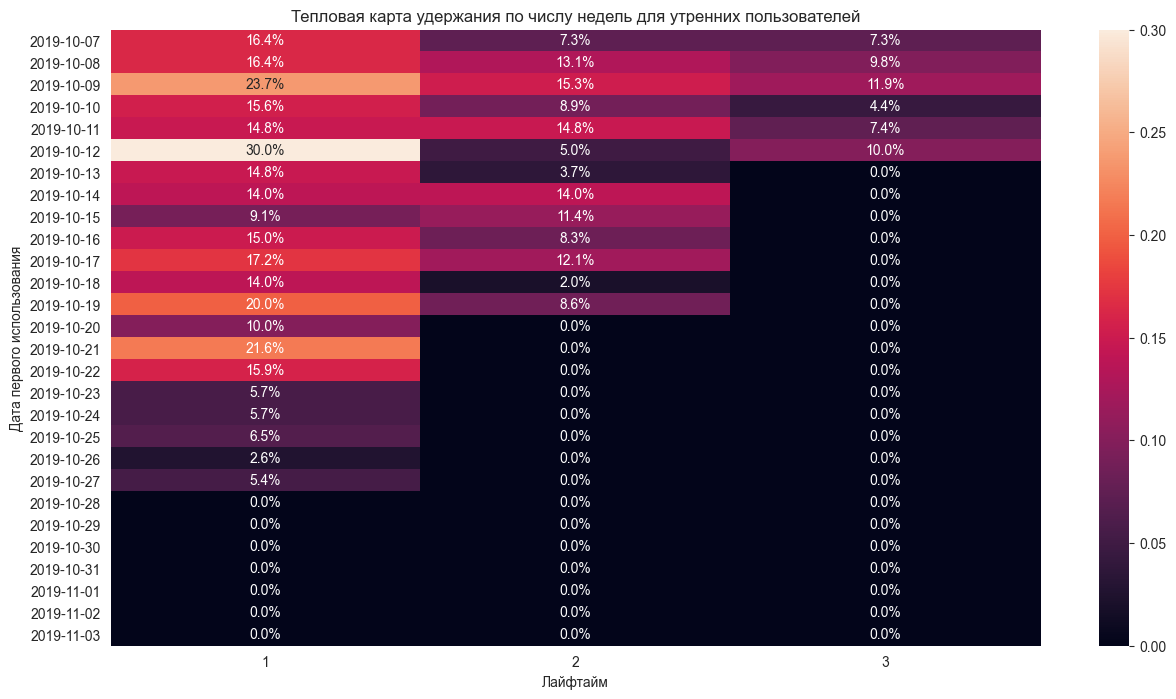

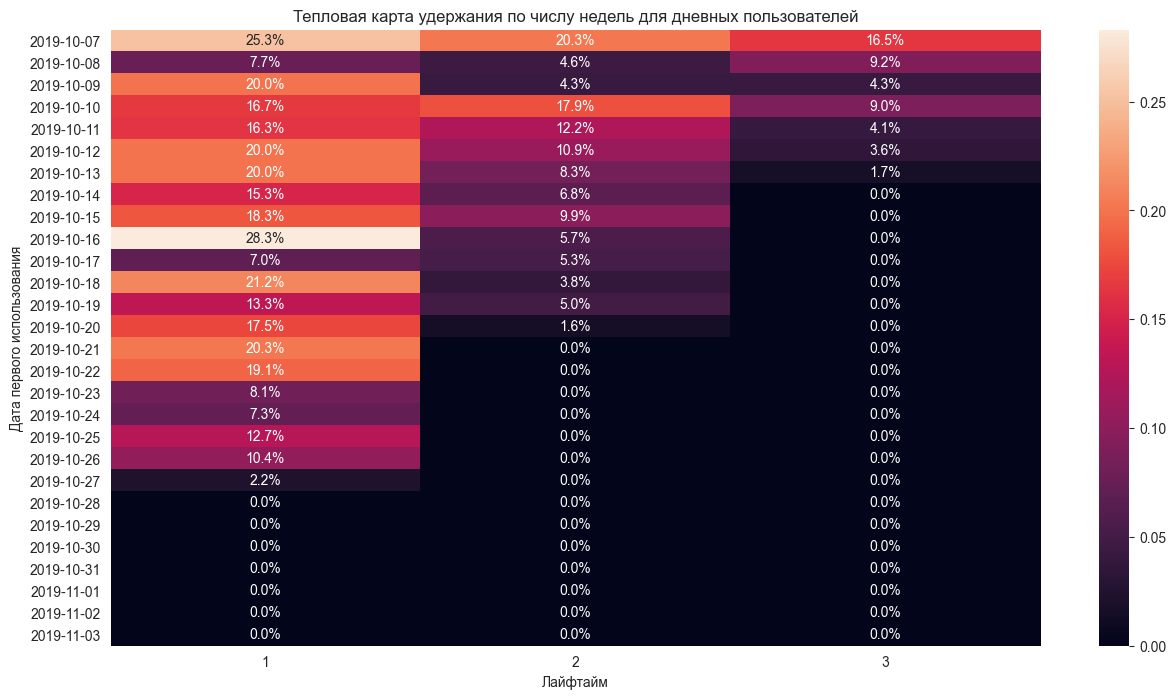

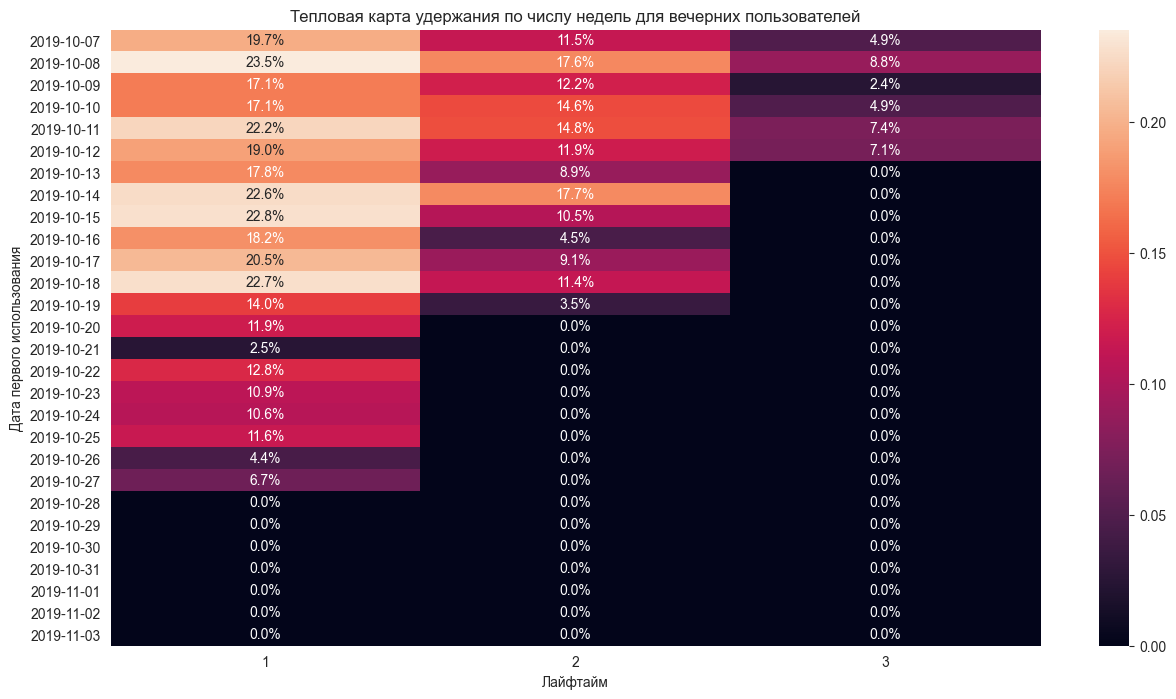

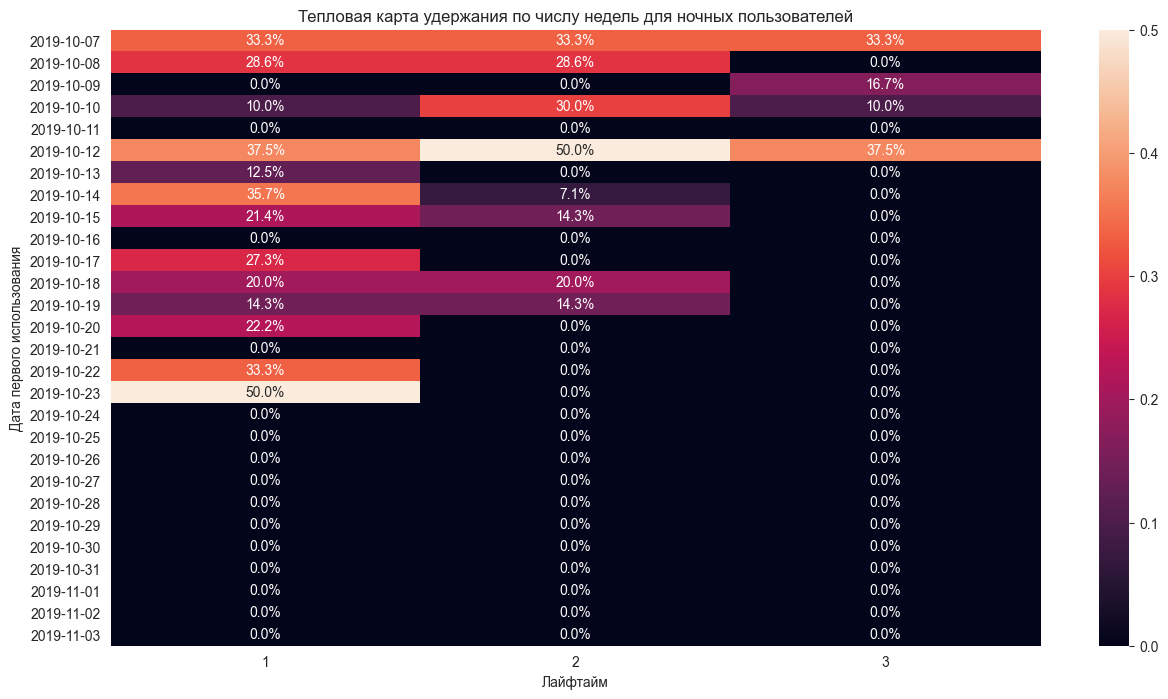

In [62]:
# строим хитмапы с помощью функции retention_rate_heatmap
retention_rate_heatmap(result_grouped_morning, 'Тепловая карта удержания по числу недель для утренних пользователей')
retention_rate_heatmap(result_grouped_afternoon, 'Тепловая карта удержания по числу недель для дневных пользователей')
retention_rate_heatmap(result_grouped_evening, 'Тепловая карта удержания по числу недель для вечерних пользователей')
retention_rate_heatmap(result_grouped_night, 'Тепловая карта удержания по числу недель для ночных пользователей')

**Дневные пользователи удерживаются лучше, чем утренние, а вечерние пользователи удерживаются лучше, чем дневные. Хуже всех удерживаются ночные пользователи.** Они кажутся самой несбалансированной по удержанию группой (но помним, что она является самой малочисленной, поэтому вероятность случайного результата сохраняется). Интересно, что ночная когорта от 12.10.2019 показывает очень высокие результаты по удержанию и выделяется на фоне других когорт, а мы помним, что когорта от 12 октября показала один из лучших результатов без учета сегментации, возможно, за счет ночной когорты.   

Поэтому рассмотрим подробнее тепловую карту ночного сегмента по каждому дню:

In [63]:
# строим дневные таблицы удержания с помощью функции retention_rate_table по каждому признаку
result_grouped_night = retention_rate_table(data_night, data_night['lifetime'])
result_grouped_morning = retention_rate_table(data_morning, data_morning['lifetime'])
result_grouped_afternoon = retention_rate_table(data_afternoon, data_afternoon['lifetime'])
result_grouped_evening = retention_rate_table(data_evening, data_evening['lifetime'])

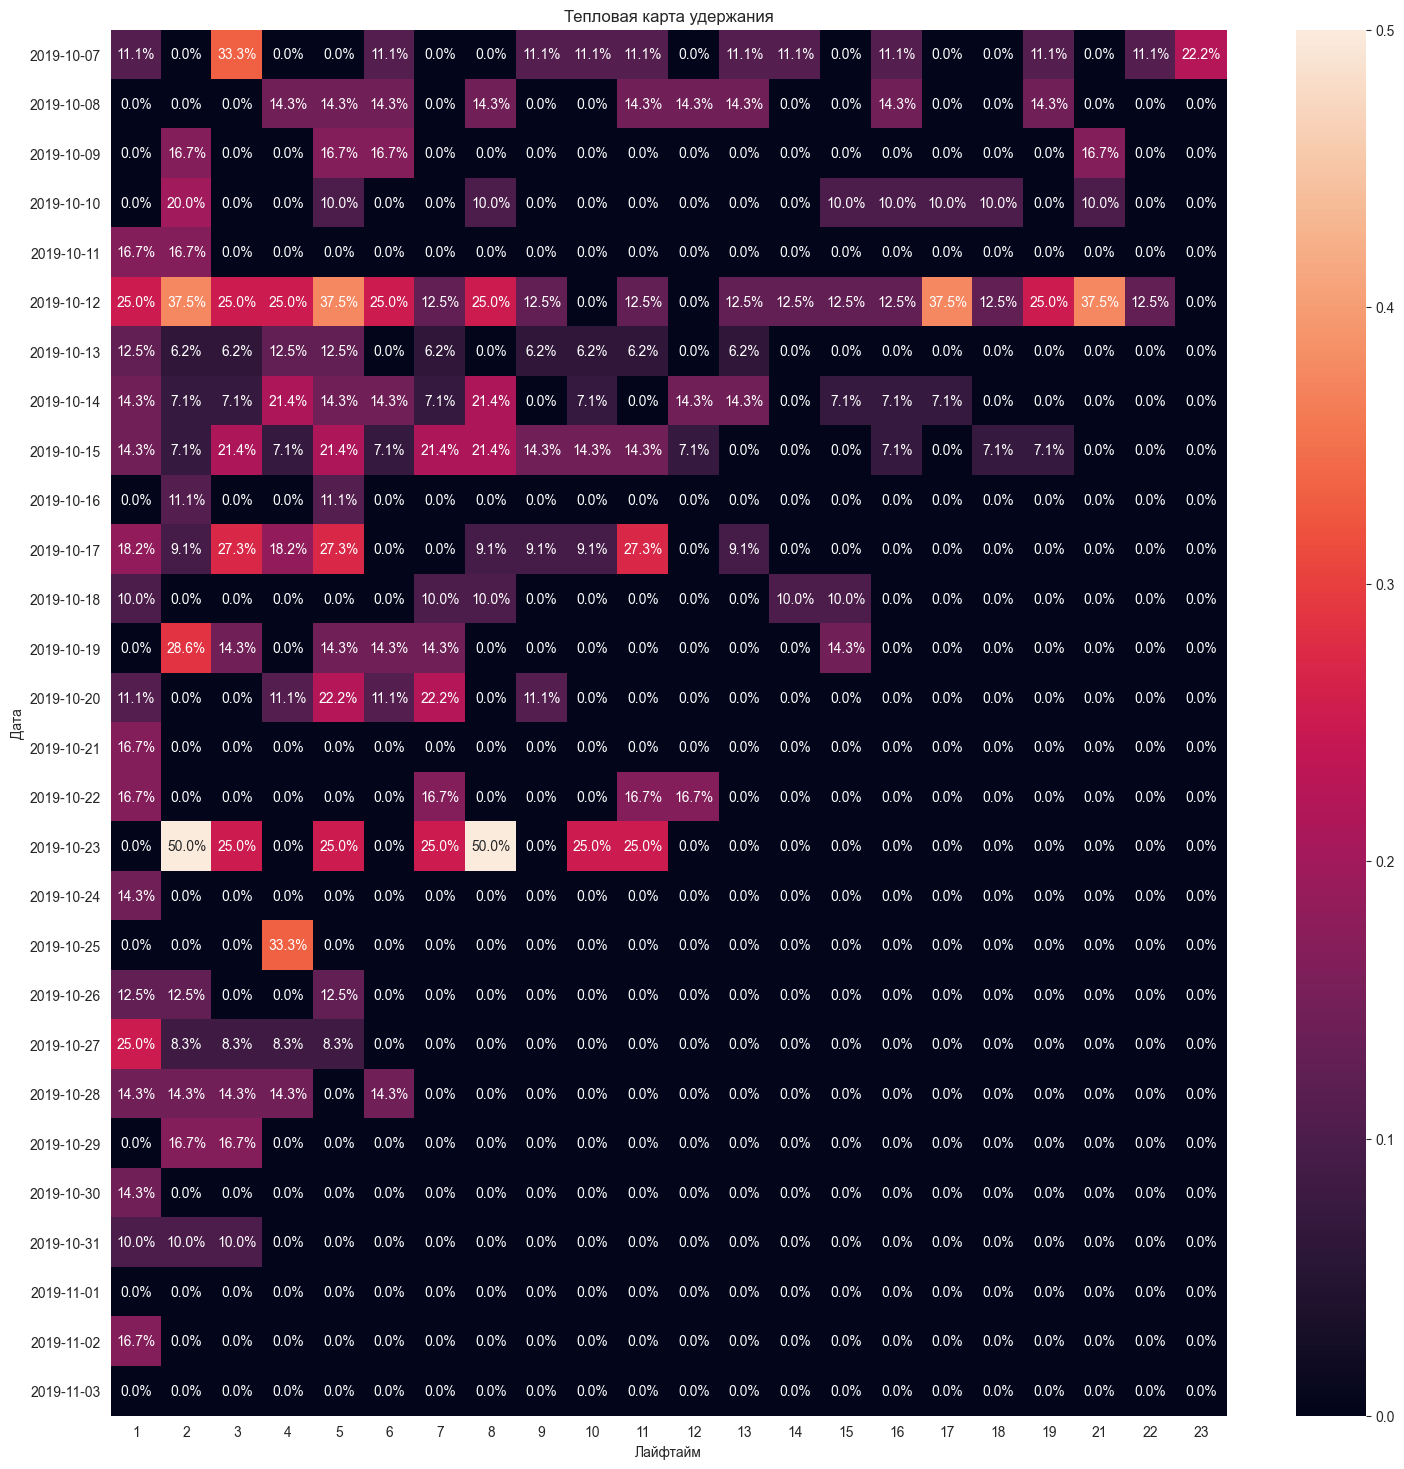

In [64]:
# строим хитмэп без нулевого лайфтайма для ночных пользователей по дням
plt.figure(figsize=(18, 18))
sns.heatmap(
    result_grouped_night.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.1%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.xlabel('Лайфтайм')
plt.ylabel('Дата')
plt.show()

Действительно, на 18 день в этой когорте посещаемость резко повысилась и удерживалась на высоком уровне несколько дней. Было бы неплохо выяснить что именно спровоцировало такой подъем примерно 27-28 октября. Это можно было бы использовать как точку роста приложения и пролонгирования удержания ночных пользователей в будущем.

Отследим динамику изменений коэффициента удержания по сегментам. Поскольку почти все пользователи успели "прожить" в приложении 2 дня, сравнивать будем динамику удержания на второй день, но еще посмотрим динамику на 7 день. Для этого создадим функцию `plot_rr`, которая выведет динамику в виде линейных графиков по каждому сегменту по расчету на определенный день (номер лайфтайма передадим на вход):

In [65]:
def plot_rr(number_of_day):
    
    plt.figure(figsize=(15,8))
    
    report = result_grouped_night.drop(columns=['cohort_size', 0]).reset_index()
    plt.plot(report['dt'], report[[number_of_day]], label='ночь')
    
    report = result_grouped_morning.drop(columns=['cohort_size', 0]).reset_index()
    plt.plot(report['dt'], report[[number_of_day]], label='утро')
    
    report = result_grouped_afternoon.drop(columns=['cohort_size', 0]).reset_index()
    plt.plot(report['dt'], report[[number_of_day]], label='день')
    
    report = result_grouped_evening.drop(columns=['cohort_size', 0]).reset_index()
    plt.plot(report['dt'], report[[number_of_day]], label='вечер')
   
    plt.xlabel('Дата привлечения')
    plt.ylabel('Доля удержания')
    plt.title('Динамика удержания пользователей на ' + str(number_of_day+1)+' день по сегментам')
    plt.legend()
    plt.show()

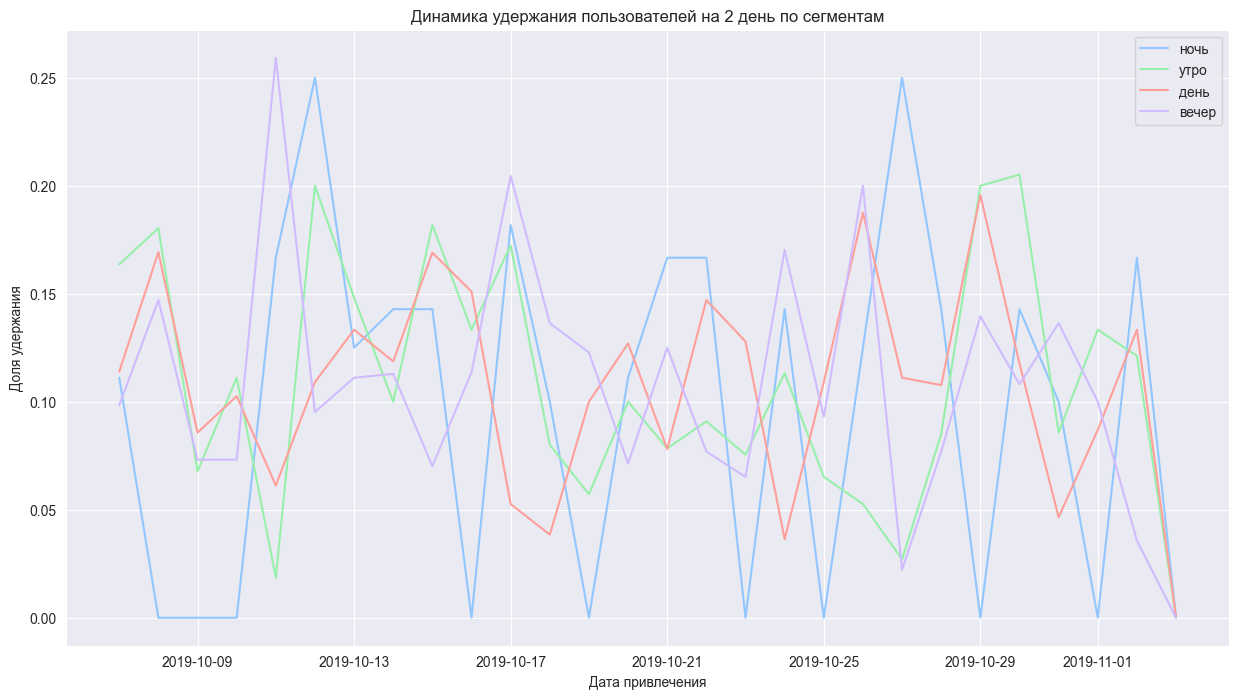

In [66]:
# строим динамику на второй день
plot_rr(1)

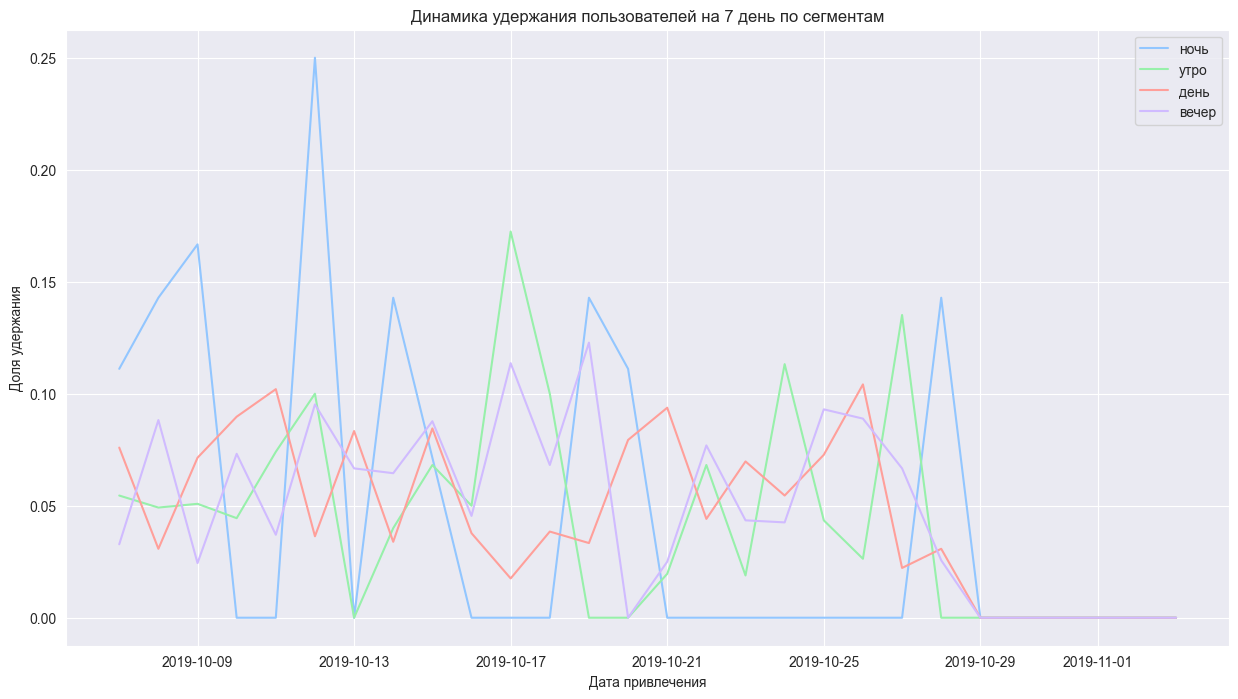

In [67]:
# строим динамику на 7 день
plot_rr(6)

Показатели динамики удержания на 2 день, конечно, в целом, выше, чем на седьмой, но общие тенденции, примерно одинаковые.   
**Самыми стабильными по удержанию из всех на 7 день кажутся дневные пользователи** (их показатели реже, чем у остальных стремились к нулю) и разброс между максимальным и минимальным значением меньше, чем у всех остальных. 
Если оценивать динамику показателя на 2 день , то разброс значений внушительный.    
**В целом, удержание пользователей вечернего сегмента выглядит лучше, чем у всех остальных, но показатель подвержен сильным колебаниям** (в среднем, он не опускался ниже 7 %, но в моменте он упал примерно до 2,5%, а в пике достиг 26%).   
Показатели ночных пользователей выглядят сами нестабильными: часто показатель подает до 0%, а пиковое значение достигает 25 %.

#### Конверсия в просмотр контактов для выделенных сегментов

Рассчитаем конверсию в просмотр контактов по сегментам, разделив число уникальных пользователей сегмента, совершивших целевое действие просмотр контактов на общее число уникальных пользователей сегмента.  Для этого создадим всомогательную функцию `comversion_segment`.

In [68]:
# создаем функцию 
def comversion_segment(df, title):
    """
    Возвращает число уникальных пользователей в сегменте, 
    число уникальных пользователей, совершивших целевое событие и уровень конверсии.   
    На вход принимает датасет, и наименование сегмента, которое нужно отразить
   
    """
    a = df['user_id'].nunique()
    b = df[df['event_name']=='contacts_show']['user_id'].nunique()
    print('')
    print(title)
    print('Число уникальных пользователей в сегменте:', a)
    print('Число уникальных пользователей, совершивших просмотр контактов:', b)
    print('Конверсия пользователей = {:.2%}'.format(b/a))
    print('')

In [69]:
# выводим конверсию по сегментам
comversion_segment(data_morning, "УТРО")
comversion_segment(data_afternoon, "ДЕНЬ")
comversion_segment(data_evening, "ВЕЧЕР")
comversion_segment(data_night, "НОЧЬ")


УТРО
Число уникальных пользователей в сегменте: 1228
Число уникальных пользователей, совершивших просмотр контактов: 290
Конверсия пользователей = 23.62%


ДЕНЬ
Число уникальных пользователей в сегменте: 1625
Число уникальных пользователей, совершивших просмотр контактов: 403
Конверсия пользователей = 24.80%


ВЕЧЕР
Число уникальных пользователей в сегменте: 1205
Число уникальных пользователей, совершивших просмотр контактов: 247
Конверсия пользователей = 20.50%


НОЧЬ
Число уникальных пользователей в сегменте: 235
Число уникальных пользователей, совершивших просмотр контактов: 41
Конверсия пользователей = 17.45%



**Лучше всех в просмотр контактов конвертируется группа дневных пользователей.** Утренние пользователи конвертируются немного хуже.  Вечерние пользователи занимают третье место по конверсии. Самый плохой результат показывает ночная группа.     
Возможно такую ситуацию можно объяснить тем, что, к примеру, утреннние и дневные пользователи совершают действия, находясь на рабочем месте, и с целью экономии времени заходят в приложение целенаправленно, чтобы быстро найти и выбрать необходимое, позвонить по объявлению и вернуться к работе, в то время как вечерние пользователи могут позволить себе расслабиться и более детально выбирать товар, или даже заходить в приложение с целью проведения вечернего досуга.

**Вывод**   
Проведена сегментация пользователей по времени совершения первого события в приложении.     
В результате выделены 4 группы пользователей:   
* 00-06 часов - ночные;    
* 06-12 часов - утренние;    
* 12-18 часов - дневные;      
* 18-00 часов - вечерние.

В приложении преобладают дневные пользователи (38% от общего числа пользователей), меньше всего - ночных пользователей (они составляют лишь 5 % от общего числа пользователей).   

Лучшее удержание демонстрируют вечерние пользователи.  Но дневные пользователи состоят с ними в конкурентной борьбе. Дневные пользователи являются более стабильными при оценке показателя в динамике, показатель вечерних пользователей сильнее подвержен колебаниям и имеет широкий размах границ.   

Лучшей по конверсии в просмотр контактов является дневная группа (конверсия составила 24,8%), затем - группа утренних пользователей (23,62%) и третье место у вечерних пользователей (20,50%).  

Оценив обе характеристики, приходим к выводу, что **целевой аудиторией можно считать дневную группу**.  Смежной группой могут стать утренние пользователи (хоть они хуже удерживаются, чем вечерняя группа, но лучше конвертируются в целевое событие), что касается вечерней группы, то стоит бороться за повышение конверсии: изучить вкусовые предпочтения сегмента и делать рассылку уведомлений в вечернее время с предложениями, которые могут понравиться, провести опрос об удовлетворенности приложением и пр.  

Стоит отметить, что самой нестабильной по удержанию и худшей по конверсии является группа ночных пользователей. Но зафиксировано резкое увеличение коэффициента удержания в районе 27-28 октября у одной из когорт. Было бы интересным ознакомиться с мероприятиями, проводимыми в то время в приложении и использовать результат как возможный потенциал развития сегмента (при его наличии).

### Шаг 5. Проверка гипотез

---

Для проверки находят ли статистические критерии разницу между выборками будем использовать z-тест, который проверит гипотезы для долей.    
В пропорции будем сравнивать число  уникальных клиентов, совершивших то или иное событие с числом уникальных клиентов всего по группе.     

Для простоты расчетов создадим функцию `z_test`.

Для расчета z-статистики будет использована формула:

$$Z \approx \cfrac{(P_1-P_2) - (\pi_1-\pi_2)}{\sqrt{P(1-P)(\frac{1}{n_1} + \frac{1}{n_2})}} \sim N(0,1)$$,    
где   
*Z* - стандартная для критерия со стандартным нормальным распределением: со средним, равным нулю, и стандартным отклонением, равным единице,    
*n1 и n2* - размеры двух сравниваемых выборок,     
*P1 и Р2*- пропорции, наблюдаемые в выборках,    
*Р* - пропорция в выборке, скомбинированной из двух наблюдаемых,    
${\pi_1}$ и ${\pi_2}$ - настоящие пропорции в сравниваемых генеральных совокупностях (в нашем случае выражение равно нулю, так как проверяется гипотеза об их равенстве)

In [70]:
def z_test(successes, trials, alpha):
    """
    Функция возвращает 
    successes - массив данных, состоящий из числа "успешных" пользователей (тех, кто совершил событие) 
    для сравниваемых групп,   
    trials - массив данных, состоящий из общего числа пользователей для сравниваемых групп,   
    alpha - уровень статистической значимости.   
   
    """
    
    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения по формуле
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = stats.norm(0, 1) 
    
    # считаем p-value и удваиваем результат, поскольку проверка двусторонняя
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-value: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

---

#### Гипотеза 1. О разнице конверсий в просмотр контактов между пользователями, пришедшими через "Yandex" и пользователями, пришедшими через "Google".

Некоторые пользователи установили приложение по ссылке из yandex, другие — из google.    
Сформулируем гипотезы:   

```
H_0: Конверсии в событие "Просмотр контактов", совершенное пользователями из "Yandex"  и совершенное пользователями из "Google" одинаковы.
H_1: Конверсии в событие "Просмотр контактов", совершенное пользователями из "Yandex"  и совершенное пользователями из "Google" различаются.

```

Еще раз выведем число уникальных пользователей из каждого источника. Результат сохраним в `sourse_group`.

In [71]:
sourse_group = data.groupby('source').agg({'user_id' :'nunique'}).reset_index()
sourse_group

,source,user_id
0,google,1129
1,other,1230
2,yandex,1934


Создадим массивы с числом успехов `successes` и с общим числом пользователей `trials` для сравниваемых групп:

In [72]:
     # число уникальных пользователей, совершивших событие в сравниваемых группах
successes = np.array([
        data_contact_show[data_contact_show['source'] == 'yandex']['user_id'].nunique(), 
        data_contact_show[data_contact_show['source'] == 'google']['user_id'].nunique()
   ])    
 
    # число уникальных пользователей в сравниваемых группах
trials = np.array([
        sourse_group[sourse_group['source'] == 'yandex']['user_id'],
        sourse_group[sourse_group['source'] == 'google']['user_id']
    ])
print('successes:', successes)
print('trials:', trials)

successes: [478 275]
trials: [[1934]
 [1129]]


Применим функцию `z_test` к полученным переменным. Уровень статистической значимости установим в 0,05.

In [73]:
alpha = 0.05
z_test(successes, trials, alpha)
print('')
print('Конверсия пользователей Яндекс:', successes[0]/trials[0]*100)
print('Конверсия пользователей Гугл:', successes[1]/trials[1]*100)

p-value:  [0.8244316]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Конверсия пользователей Яндекс: [24.71561531]
Конверсия пользователей Гугл: [24.3578388]


По результатм статистического теста не получилось отвергнуть нулевую гипотезу. Значение p-value > 0,05. Это означает, что статистически значимых различий в конверсиях между группами нет.    
Таким образом, **нет оснований полагать, что конверсии в просмотр контактов пользователей из Яндекс и Гугл отличаются**.

#### Гипотеза 2. О разнице конверсий в просмотр контактов между пользователями, просмотревшими фотографии в объявлении и пользователями,никогда не смотревшими фотографии.  

Многие пользователи просматривают фотографии в объявлении, а кто-то никогда этого не делал. 
Сформулируем гипотезы:
```
H_0: Конверсии в целевое событие "Просмотр контактов", совершенное пользователями просмотревшими фотографии в объявлении и пользователями, которые фотографии не просматривают одинаковые.
H_1: Конверсии в целевое событие "Просмотр контактов", совершенное пользователями просмотревшими фотографии в объявлении и пользователями, которые фотографии не просматривают различаются.

```

Для начала выявим пользователей, которые хоть раз совершали событие "просмотр фотографии", результат сохраним в `user_photo_list`.

In [74]:
user_photo_list = data[data['event_name'] == 'photos_show']['user_id'].unique()
len(user_photo_list)

1095

1095 пользователей просматривали фотографии как минимум один раз. **Получается, что только 26% пользователей смотрят фотографии.**

В соответствии с `user_photo_list` разделим датасет на два: `sample_photos_show` - действия пользователей, которые хоть раз смотрели фотографии и `sample_not_photos_show` - действия пользователей, которые никогда не смотрели фотографии.

In [75]:
# отделяем события пользователей, которые совершали просмотр фотографий
sample_photos_show = data[data['user_id'].isin(user_photo_list)]

# отделяем события пользователей, которые никогда не смотрели фотографии
sample_not_photos_show = data[~data['user_id'].isin(user_photo_list)]

Создадим массивы с числом успехов `successes` и с общим числом пользователей `trials` для сравниваемых групп:

In [76]:
     # число уникальных пользователей, совершивших событие в сравниваемых группах
successes = np.array([
        sample_photos_show[sample_photos_show['event_name'] == 'contacts_show']['user_id'].nunique(), 
        sample_not_photos_show[sample_not_photos_show['event_name'] == 'contacts_show']['user_id'].nunique()
   ])    
 
    # число уникальных пользователей в сравниваемых группах
trials = np.array([
        sample_photos_show['user_id'].nunique(),
        sample_not_photos_show['user_id'].nunique()
    ])
print('successes:', successes)
print('trials:', trials)

successes: [339 642]
trials: [1095 3198]


Применим функцию `z_test` к полученным переменным. Уровень статистической значимости по-прежнему 0,05.

In [77]:
z_test(successes, trials, alpha)
print('')
print('Конверсия пользователей смотревших фотографии:', successes[0]/trials[0]*100)
print('Конверсия пользователей не смотревших фотографии:', successes[1]/trials[1]*100)

p-value:  1.3278267374516872e-13
Отвергаем нулевую гипотезу: между долями есть значимая разница

Конверсия пользователей смотревших фотографии: 30.958904109589042
Конверсия пользователей не смотревших фотографии: 20.075046904315197


Проведение статистического теста **выявило различие между конверсиями тех пользователей, которые смотрят фотографии и тех пользователей, которые фотографии не смотрят**. Значение p-value меньше, чем 0,05 поэтому можем отвергнуть нулевую гипотезу в пользу альтернативной: конверсии сравниваемых групп различаются.

### Общие выводы по исследованию

В процессе исследования было изучено поведение 4293 пользователей мобильного приложения по продаже ненужных вещей, которые совершили 73054 события. Для исследования были предоставлены данные за период с 07.10.2019 по 03.11.2019 (28 дней).   

Пользователи совершают 9 видов событий.     
Наиболее популярное - "пользователь увидел рекомендованное объявление" (совершено 39907 раз, что составляет 55% всех событий). Среди остальных событий наиболее часто пользователи просматривают фотографии (9352 раза или 13% всех событий). Поиск по сайту и открытие карточки объявления совершается примерно в равных долях (9% и 8% случаев, соответственно). Целевым в исследовании является событие просмотр контактов. На его долю приходится 6% от всех событий.    
В среднем, ежедневно происходит 2609 событий.     

В ходе исследования было установлено, что не все пользователи видели рекомендованные объявления, а из тех, кто видел - в целевое событие конвертировалось только 18% (значительно меньше, чем общая конверсия по приложению).    

Отметим, что у половины изучаемой совокупности число дней, проведенных в приложении, не превышает одного. Повторно в другой день после регистрации в приложение возвращается только 36% пользователей.   
В процессе исследования для оценки времени, проведенного в приложении нами самостоятельно было выделено 10368 пользовательский сессий, ввиду отсутствия такой информации в исходных данных.  Таким образом, в среднем, на одного пользователя приходится 2.4 сессии. Средняя продолжительность сессии составляет около 9 минут. В основном, сессии состоят из совокупности событий.    

Больше всего пользователей приходит в приложение из Яндекса - 45%, 26% - пользователи из Гугла, остальные пользователи - из других источников.

Установлено, что события по времени суток происходят не равномерно. В связи с этим бли выделены 4 сегмента пользователей:    
* 00-06 часов - ночные;    
* 06-12 часов - утренние;    
* 12-18 часов - дневные;      
* 18-00 часов - вечерние.  

Лучшими по удержанию стали вечерние пользователи. Но дневные пользователи составляют им неплохую конкуренцию (они более стабильны при оценке показателя в динамике, показатель вечерних пользователей сильнее подвержен колебаниям и имеет широкий размах границ).   

Лучшей по конверсии в просмотр контактов является дневная группа (конверсия составила 24,8%), затем - группа утренних пользователей (23,62%) и третье место у вечерних пользователей (20,50%).  

Самой нестабильной по удержанию и худшей по конверсии является группа ночных пользователей.

Оценив все характеристики, приходим к выводу, что **целевой аудиторией можно считать дневную группу**. 

Проверили 2 ГИПОТЕЗЫ:

Гипотеза 1. О разнице конверсий в просмотр контактов между пользователями, пришедшими через "Yandex" и пользователями, пришедшими через "Google"     
В результате проверки установили, что нет оснований полагать, что конверсии в просмотр контактов пользователей из Яндекс и Гугл отличаются;     

Гипотеза 2. О разнице конверсий в просмотр контактов между пользователями, просмотревшими фотографии в объявлении и пользователями,никогда не смотревшими фотографии.    
В результате проверки получилось отвергнуть нулевую гипотезу в пользу альтернативной. Тестирование выявило различие между конверсиями тех пользователей, которые смотрят фотографии и тех пользователей, которые фотографии не смотрят.     

**РЕКОМЕНДАЦИИ**

* Для повышения уровня удержания пользователей, которые зарегестрированы в приложении больше 8 дней, рекомендуем рассмотреть возможность делать рассылки-напоминания об интересных особенностях приложения, о внесенных новшествах, о том, что товары находятся в корзине, или о том, что цена на просматриваемые товары снизилась.
* Замечено, что показ рекомендованных объявлений не работает в полную силу: конверсия в просмотры контактов на порядок ниже, чем общая конверсия. В связи с этим рекомендуем детальнее проанализировать механизм подборки и демонстрации рекомендованных объявлений пользователю и усовершенствовать его.    
* Возможно, стоит более детально изучить группу вечерних пользователей, поскольку их удержание лучше, чем у всех остальных сегментов и направить силы на повышение их конверсии: например, подробнее изучить их вкусы и предпочтения, проанализировать их мнение по удовлетворенности приложением и на основании полученных результатов внести изменения.   
* В связи с тем, что тестирование выявило различие между конверсиями тех пользователей, которые смотрят фотографии и тех пользователей, которые фотографии не смотрят - рекомендуем присмотреться к более логичному и привлекательному интерфейсу для перехода к просмотру фотографий; в случае, если фотографии физически нет в объявлении - рассылать рекомендации продавцам с советом о загрузке фото.    


* Повторимся, что время пользовательских сессий выделено нами самостоятельно. Считаем важным отметить, что грубость подхода выделения сессий могла повлиять на результат, и в случае, если бы были зафиксированы реальные данные, то результат исследования пользовательских сессий мог бы оказаться другим. В связи с чем рекомендуем рассмотреть возможность автоматического сбора данных о длительности пользовательских сессий на уровне отдела разработки и проведения повторного исследования для подтверждения результата.       
* При наличии возможности, было бы полезным уточнить у отдела маркетинга и разработки проводились ли какие-то маркетингове кампании и нововведения в приложении за исследуемый период.




